In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate as tab
from scipy.stats import kurtosis as krt
import warnings
warnings.filterwarnings('ignore')

# Brazil Housing

In [2]:
df=pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
# Renaming the animal column values as the spelling was incorrect
df['animal'].replace(['acept','not acept'],['accept','not accept'],inplace=True)

In [4]:
t1={'Columns name':df.columns,
    'Data type':df.dtypes,
    'Count of missing values':df.isnull().sum()}
print(tab(t1,headers='keys',tablefmt='psql'))

+---------------------+-------------+---------------------------+
| Columns name        | Data type   |   Count of missing values |
|---------------------+-------------+---------------------------|
| city                | object      |                         0 |
| area                | int64       |                         0 |
| rooms               | int64       |                         0 |
| bathroom            | int64       |                         0 |
| parking spaces      | int64       |                         0 |
| floor               | int64       |                         0 |
| animal              | object      |                         0 |
| furniture           | object      |                         0 |
| hoa (R$)            | int64       |                         0 |
| rent amount (R$)    | int64       |                         0 |
| property tax (R$)   | int64       |                         0 |
| fire insurance (R$) | int64       |                         0 |
| total (R

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [6]:
df.select_dtypes(np.number)        # all numerical columns

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70,2,1,1,7,2065,3300,211,42,5618
1,320,4,4,0,20,1200,4960,1750,63,7973
2,80,1,1,1,6,1000,2800,0,41,3841
3,51,2,1,0,2,270,1112,22,17,1421
4,25,1,1,0,1,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...
10687,63,2,1,1,5,402,1478,24,22,1926
10688,285,4,4,4,17,3100,15000,973,191,19260
10689,70,3,3,0,8,980,6000,332,78,7390
10690,120,2,2,2,8,1585,12000,279,155,14020


In [7]:
df.select_dtypes(np.object)        # all categorical columns

,city,animal,furniture
0,São Paulo,accept,furnished
1,São Paulo,accept,not furnished
2,Porto Alegre,accept,not furnished
3,Porto Alegre,accept,not furnished
4,São Paulo,not accept,not furnished
...,...,...,...
10687,Porto Alegre,not accept,furnished
10688,São Paulo,accept,not furnished
10689,Rio de Janeiro,not accept,furnished
10690,Rio de Janeiro,accept,furnished


In [8]:
def data_type(df):
    global obj, num
    obj=list(df.select_dtypes(np.object))
    num=list(df.select_dtypes(np.number))
    print(tab({'Categorical':obj,'Numerical':num},headers='keys',tablefmt='psql'))
data_type(df)

+---------------+---------------------+
| Categorical   | Numerical           |
|---------------+---------------------|
| city          | area                |
| animal        | rooms               |
| furniture     | bathroom            |
|               | parking spaces      |
|               | floor               |
|               | hoa (R$)            |
|               | rent amount (R$)    |
|               | property tax (R$)   |
|               | fire insurance (R$) |
|               | total (R$)          |
+---------------+---------------------+


In [9]:
ct=df.groupby('city')['rent amount (R$)'].agg(['mean', 'median', 'std']).reset_index()
ct

,city,mean,median,std
0,Belo Horizonte,3664.127981,2300.0,3493.664840
1,Campinas,2364.290739,1500.0,2310.903378
2,Porto Alegre,2337.699916,1650.0,2199.696033
3,Rio de Janeiro,3232.904064,2300.0,2804.265614
4,São Paulo,4652.793783,3400.0,3634.612007


In [5]:
df1=df[(df.city!='Rio de Janeiro') & (df.city!='São Paulo')]
df1

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,accept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,accept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,accept,not furnished,550,580,43,8,1181
15,Campinas,330,4,6,6,0,accept,furnished,680,8000,328,121,9129
21,Belo Horizonte,42,1,1,1,17,not accept,furnished,470,2690,172,36,3368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,Belo Horizonte,75,2,1,1,3,not accept,not furnished,180,1250,0,17,1447
10673,Porto Alegre,220,3,2,2,15,accept,not furnished,842,2400,117,36,3395
10676,Porto Alegre,40,1,1,0,1,accept,not furnished,330,1200,159,18,1707
10682,Porto Alegre,160,3,2,3,4,accept,furnished,850,3300,220,49,4419


#### We filtered out the two expensive cities from where people wants to relocate.

In [6]:
sorted_area=df1.sort_values('area')
sorted_area.reset_index(inplace=True)
area_grp=sorted_area.groupby('area').size().reset_index(name='properties available')
area_grp

,area,properties available
0,15,4
1,16,1
2,18,3
3,19,2
4,20,11
...,...,...
382,1000,3
383,1020,1
384,2000,2
385,12732,1


#### number of properties available area-wise

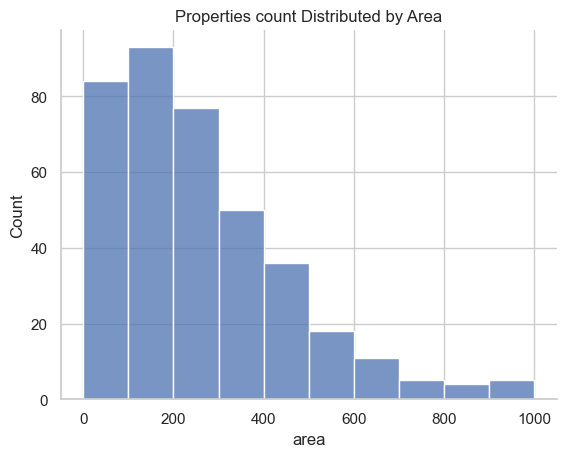

In [7]:
sns.set(style='whitegrid')
bins=[0,100,200,300,400,500,600,700,800,900,1000]
sns.histplot(data=area_grp, x='area',bins=bins)
plt.title('Properties count Distributed by Area')
sns.despine()
plt.show()

# For Bachelors:

In [13]:
bachelors=df1[(df1.area<145) & (df1.rooms<2) & (df1.bathroom<2) &
              (df1['parking spaces']<2) & (df1.floor<2)].sort_values('total (R$)')
bachelors

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10627,Belo Horizonte,22,1,1,0,0,accept,not furnished,30,450,13,6,499
8183,Porto Alegre,30,1,1,0,0,not accept,not furnished,0,500,0,9,509
10218,Belo Horizonte,25,1,1,1,1,not accept,not furnished,0,500,38,7,545
4294,Belo Horizonte,20,1,1,0,1,not accept,not furnished,0,500,42,7,549
2121,Porto Alegre,25,1,1,0,0,not accept,not furnished,0,550,0,9,559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,Campinas,50,1,1,0,1,not accept,furnished,640,2000,100,26,2766
9445,Campinas,55,1,1,1,1,not accept,not furnished,600,2230,0,29,2859
3849,Belo Horizonte,60,1,1,1,0,accept,not furnished,0,3000,0,40,3040
10072,Porto Alegre,42,1,1,1,1,accept,furnished,650,2400,81,36,3167


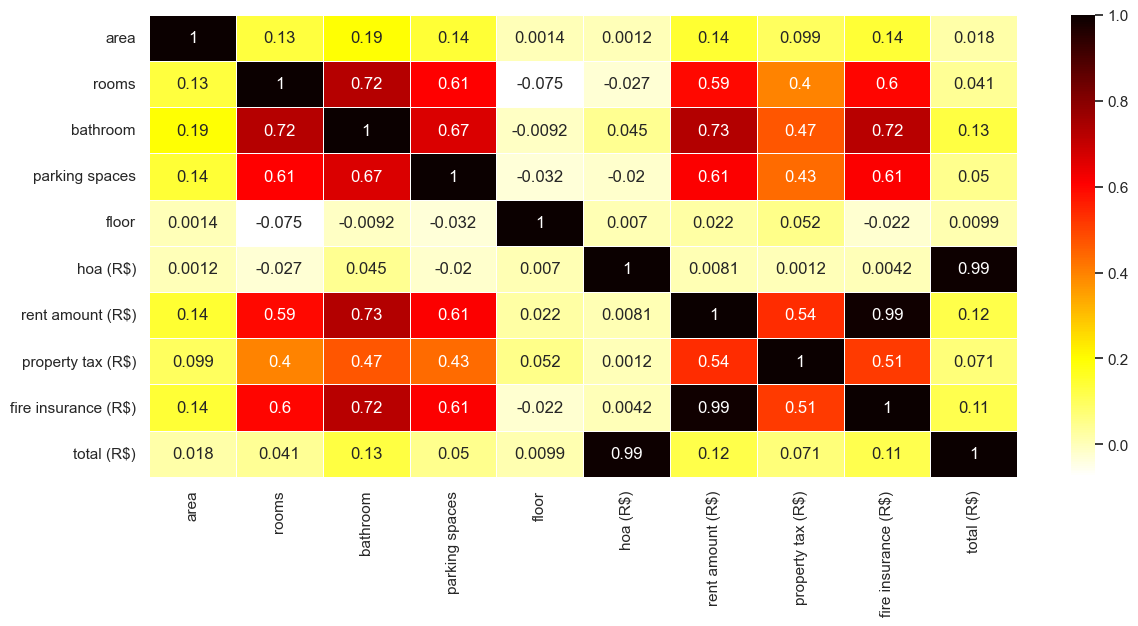

In [14]:
sns.set(style="white")
plt.figure(figsize=(14,6))
sns.heatmap(df1.corr(),cbar=True,cmap='hot_r',linewidths=0.5,annot=True)
plt.show()
# ,square=True

# Univariate

In [15]:
bach_cat_col=bachelors.select_dtypes(np.object)
def info_cat(bach_cat_col):
    table1={'Categorical Columns':bach_cat_col.columns,
           'Unique Values':bach_cat_col.nunique(),
           'Mode':bach_cat_col.mode().iloc[0].tolist(),
           'Missing values':bach_cat_col.isnull().sum()}
    print(tab(table1,headers='keys',tablefmt='psql'))
info_cat(bach_cat_col)

+-----------------------+-----------------+---------------+------------------+
| Categorical Columns   |   Unique Values | Mode          |   Missing values |
|-----------------------+-----------------+---------------+------------------|
| city                  |               3 | Porto Alegre  |                0 |
| animal                |               2 | not accept    |                0 |
| furniture             |               2 | not furnished |                0 |
+-----------------------+-----------------+---------------+------------------+


### No. of unique values, mode and missing values of categorical column in bachelors data

In [16]:
bach_num_col=bachelors.select_dtypes(np.number)
def info_num(bach_num_col):
    table2={'Numerical Columns':bach_num_col.columns,
            'Mean':bach_num_col.mean(),
            'Median':bach_num_col.median(),
            'Mode':bach_num_col.mode().iloc[0].tolist(),
            'Standard Deviation':bach_num_col.std(),
            'Missing values':bach_num_col.isnull().sum()}
    print(tab(table2,headers='keys',tablefmt='psql'))
info_num(bach_num_col)

+---------------------+-------------+----------+--------+----------------------+------------------+
| Numerical Columns   |        Mean |   Median |   Mode |   Standard Deviation |   Missing values |
|---------------------+-------------+----------+--------+----------------------+------------------|
| area                |   40.6865   |       40 |     47 |            14.1094   |                0 |
| rooms               |    1        |        1 |      1 |             0        |                0 |
| bathroom            |    1        |        1 |      1 |             0        |                0 |
| parking spaces      |    0.443243 |        0 |      0 |             0.498116 |                0 |
| floor               |    0.659459 |        1 |      1 |             0.475177 |                0 |
| hoa (R$)            |  212.892    |      200 |      0 |           222.562    |                0 |
| rent amount (R$)    | 1148.75     |     1020 |   2200 |           533.414    |                0 |


### Mean, Median, Mode, Standard deviation, missing values of numerical column in bachelors data

In [17]:
bach1=bachelors.groupby('city').size().reset_index(name='Properties available')
bach1

,city,Properties available
0,Belo Horizonte,62
1,Campinas,33
2,Porto Alegre,90


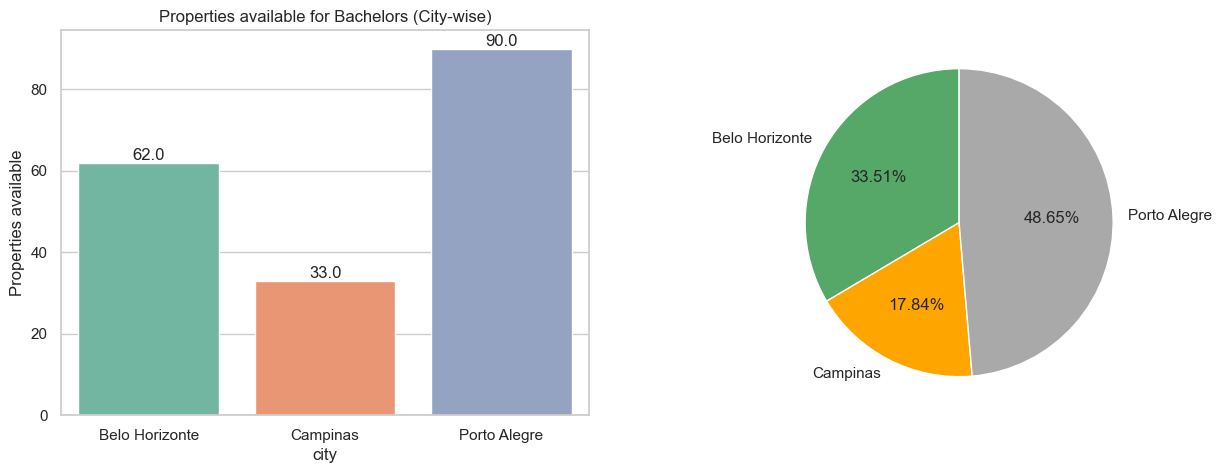

In [18]:
sns.set(style='whitegrid')
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Properties available for Bachelors (City-wise)')
ax=sns.barplot(data=bach1,x='city',y='Properties available',ax=ax[0],palette='Set2')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.pie(bach1['Properties available'],labels=bach1['city'],
        autopct='%0.2f%%',startangle=90,colors=['g','orange','darkgrey'])
plt.show()

# Interpretation:
## Here, the number of properties available for bachelors is highest in Poro Alegre, so there'll be so many options of properties will be available in Porto Alegre City for bachelors to choose.

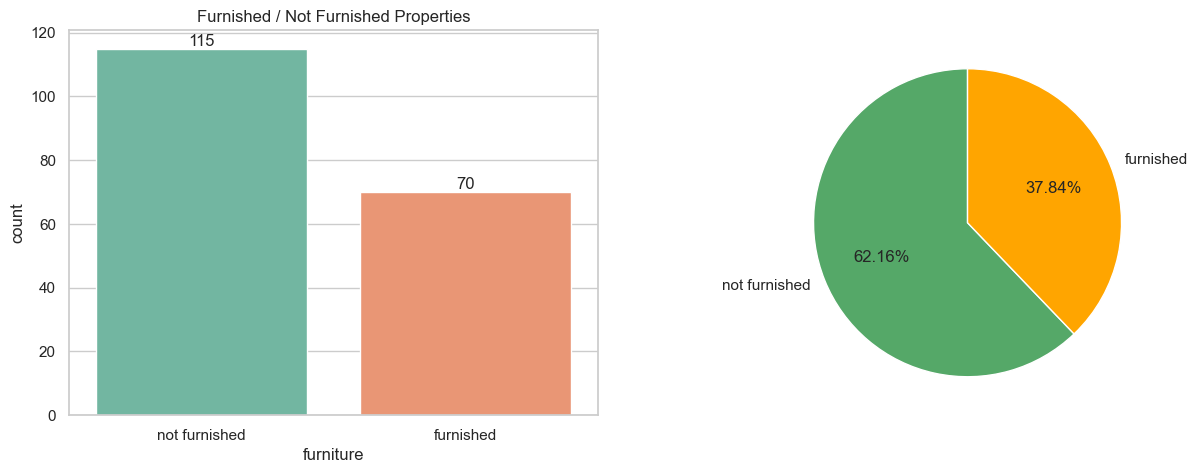

In [19]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Furnished / Not Furnished Properties')
percentage=bachelors['furniture'].value_counts()
label=percentage.keys()
ax=sns.countplot(x=bachelors['furniture'],ax=ax[0],palette='Set2')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.pie(percentage,labels=label,autopct='%0.2f%%',startangle=90,colors=['g','orange'])
plt.show()

# Interpretation:
## The number of furnished properties are just 70 for bachelors while on other hand number of non-furnished properties are about 115, So for those bachelors who're trying to find a furnished house will be a little challenging for them. 

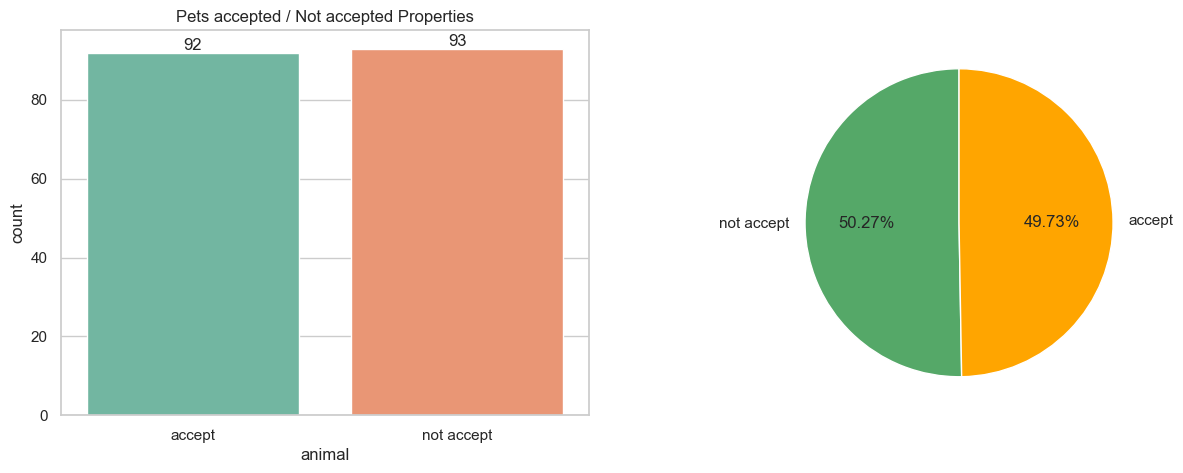

In [20]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Pets accepted / Not accepted Properties')
per=bachelors['animal'].value_counts()
ax=sns.countplot(x=bachelors['animal'],ax=ax[0],palette='Set2')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.pie(per,labels=per.keys(),autopct='%0.2f%%',startangle=90,colors=['g','orange'])
plt.show()

# Interpretation:
## so the number of properties who accept animal and who doesn't are almost similar i.e. 92 & 93, and mostly bachelors doesn't consider having a pet by their side, so they can go with any option over here.

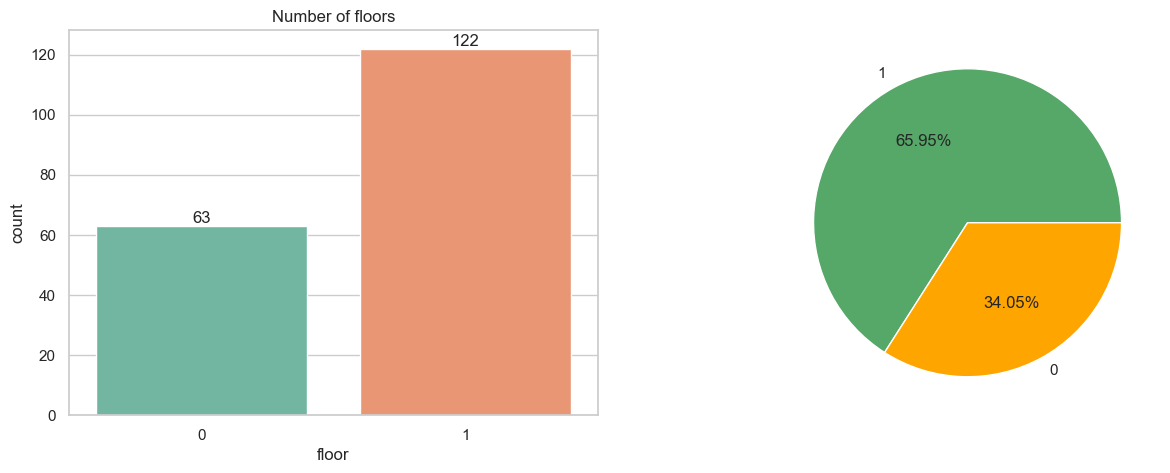

In [21]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Number of floors')
per=bachelors['floor'].value_counts()
ax=sns.countplot(x=bachelors['floor'],ax=ax[0],palette='Set2')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.pie(per,labels=per.keys(),autopct='%0.2f%%',colors=['g','orange'])
plt.show()

# Interpretation:
## So, where the number of floors is 1 is the highest among 0 and 1 number of floors so, it'll be easy to find 1 floor properties so bachelors can choose accordingly on the basis of their uses. 

# Bivariant

In [22]:
bach2=bachelors.groupby('city')[['area']].mean().reset_index()
bach2

,city,area
0,Belo Horizonte,33.677419
1,Campinas,46.181818
2,Porto Alegre,43.500000


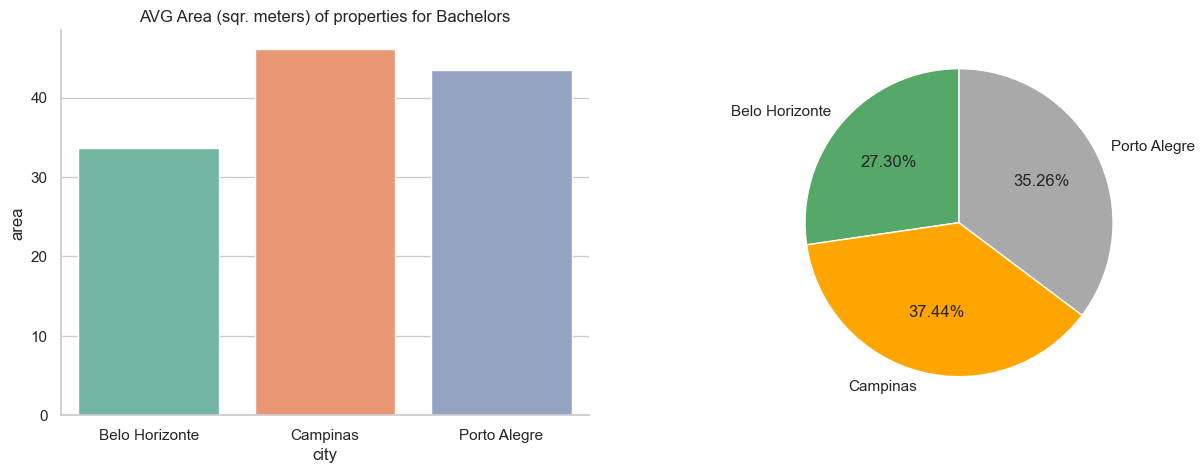

In [23]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('AVG Area (sqr. meters) of properties for Bachelors')
sns.barplot(data=bach2,x='city',y='area',ax=ax[0],palette='Set2')
plt.pie(bach2['area'],labels=bach2['city'],autopct='%0.2f%%',startangle=90,colors=['g','orange','darkgrey'])
sns.despine()
plt.show()

# Interpretation:
## average area of properties is the highest in Campinas city and the least in Belo Horizonte, so mostly bachelors doesn't require enough area to livein so they can go with Belo Horizonte City and there will a slight difference in rents aswell because of the lesser area in the city. 

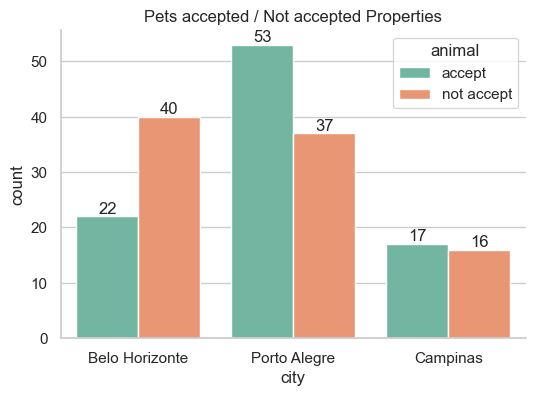

In [24]:
fig,ax=plt.subplots(figsize=(6,4))
sns.countplot(x='city',hue='animal',data=bachelors,palette='Set2')
ax.set_title('Pets accepted / Not accepted Properties')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
sns.despine()
plt.show()

# Interpretation:
## As said earlier, bachelors doesn't really prefer pets because it can be difficult for them to take care of any pet, 
## So here we can see, The properties available who doesn't accept animals is the highest in Belo Horizonte, so for bachelors it'll be easier to relocate in the Belo Horizonte city for bachelors who doesn't prefer animals with them.

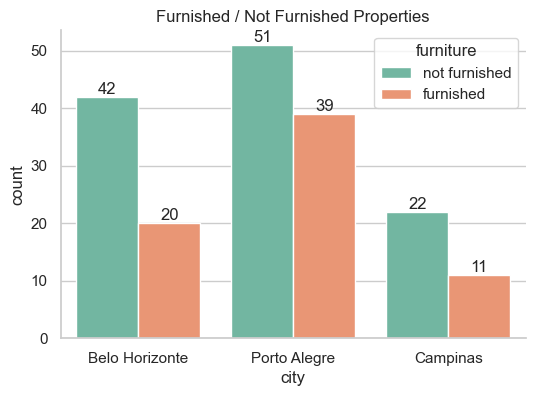

In [25]:
fig,ax=plt.subplots(figsize=(6,4))
sns.countplot(x='city',hue='furniture',data=bachelors,palette='Set2')
ax.set_title('Furnished / Not Furnished Properties')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
sns.despine()
plt.show()

# Interpretation:
## Here, number of not furnished properties are most in Porto Alegre city (i.e. 51) aswell as furnished properties too, so on the basis of furnitures Porto Alegre will be the best city to relocate for bachelors

In [26]:
bach3=bachelors.groupby('city')[['total (R$)']].mean().reset_index()
bach3

,city,total (R$)
0,Belo Horizonte,1187.419355
1,Campinas,1507.484848
2,Porto Alegre,1533.311111


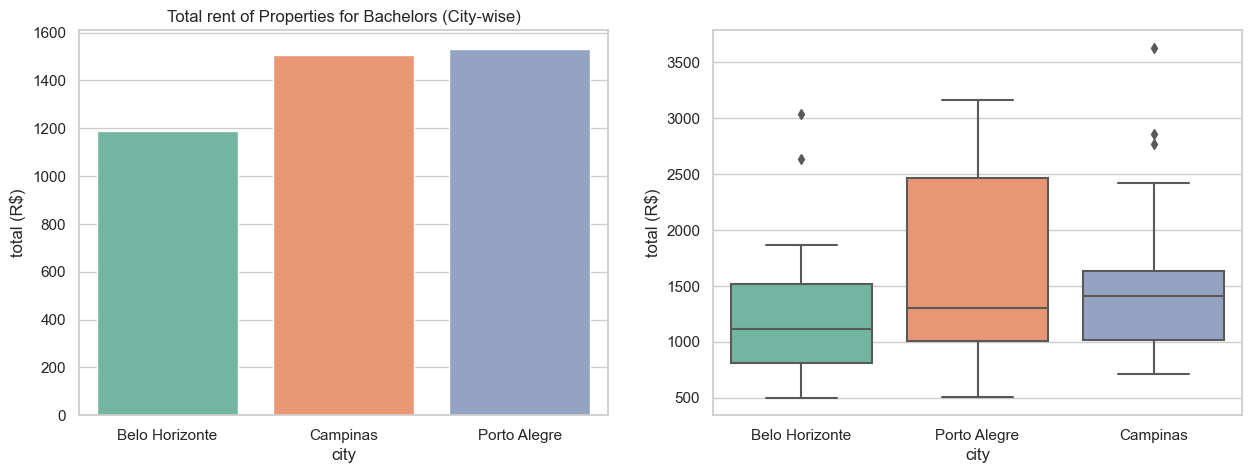

In [27]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Total rent of Properties for Bachelors (City-wise)')
sns.barplot(data=bach3,x='city',y='total (R$)',ax=ax[0],palette='Set2')
sns.boxplot(x='city',y='total (R$)',data=bachelors,palette='Set2')
plt.show()

# Interpretation:
## The total rent amount of propeties for bachelors is the least in Belo Horizonte city, so bachelors can prefer this city for their recolation because this city will be really cheaper for them according to there needs

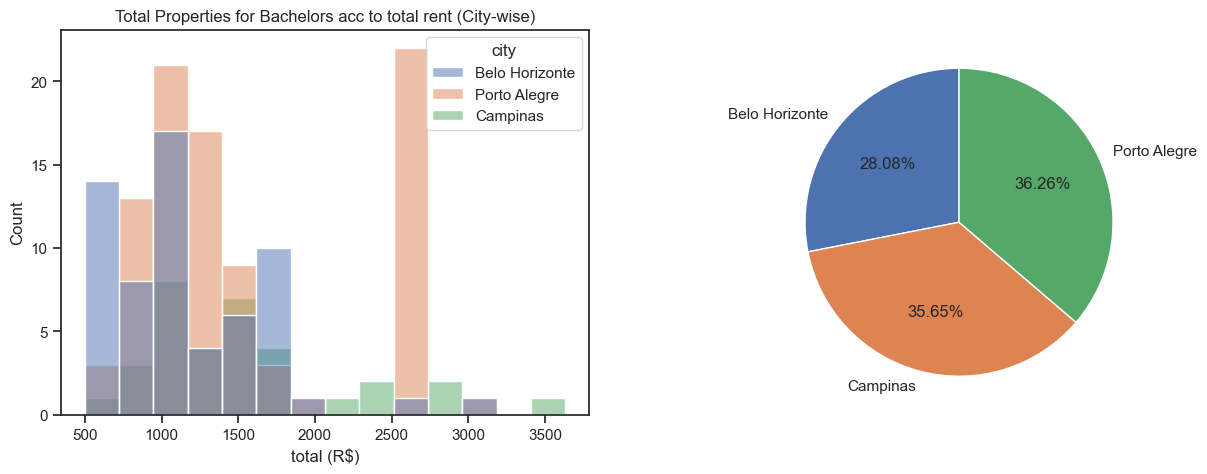

In [28]:
sns.set(style='ticks')
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Total Properties for Bachelors acc to total rent (City-wise)')
sns.histplot(x='total (R$)',hue='city',data=bachelors,ax=ax[0])
plt.pie(bach3['total (R$)'],labels=bach3['city'],
        autopct='%0.2f%%',startangle=90)
plt.show()

# Interpretation:
## according to the above chart, the number of properties between total rent range of 2500-2750 is the highest for Porto Alegre but between the total rent range of 1000-1250 is the second highest for Belo Horizonte which is also cheaper than Porto Alegre.
## So, for bachelors who're searching for a property with lesser total rent they can go with Belo Horizonte as this city will be really benificial for them on the basis of rent

In [29]:
bach4=bachelors.groupby('city')['total (R$)'].agg(['mean', 'median', 'std']).reset_index()
bach4

,city,mean,median,std
0,Belo Horizonte,1187.419355,1115.0,495.680739
1,Campinas,1507.484848,1408.0,671.324815
2,Porto Alegre,1533.311111,1297.5,712.315541


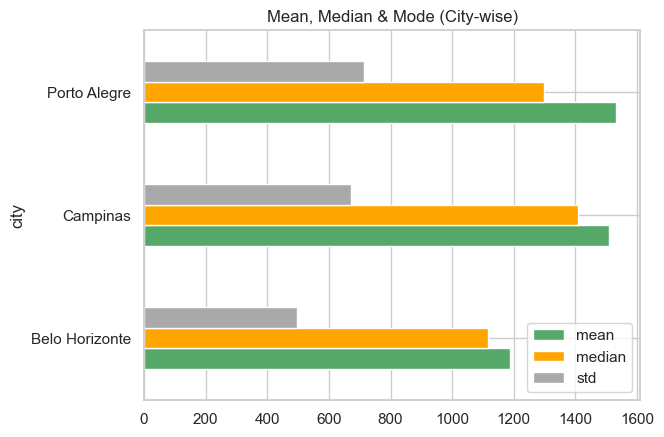

In [30]:
sns.set(style='whitegrid')
bach4.plot.barh(x='city',color=['g','orange','darkgrey'])
plt.title('Mean, Median & Mode (City-wise)')
plt.show()

# Interpretation:
## Mean, Median & Standard deviation of totel rent is the highest for Porto Alegre, so this city will not be much pocket friendly for bachelors, whereas the mean is least of total rent in the Belo Horizonte city. So on the basis of total rent bachelors can recolate to the pocket friendly city Belo Horizonte. 

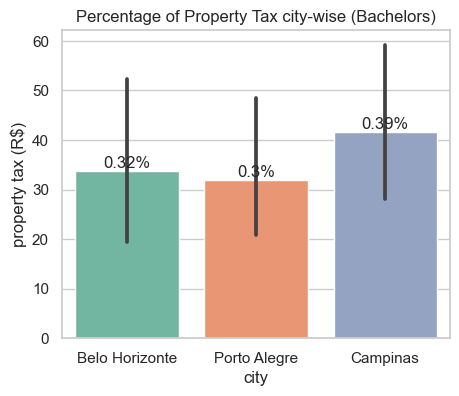

In [31]:
fig,ax=plt.subplots(figsize=(5,4))
ax=sns.barplot(data=bachelors,y='property tax (R$)',x='city',palette='Set2')
plt.title('Percentage of Property Tax city-wise (Bachelors)')
for bar in ax.patches:
    percentage=f"{round(bar.get_height() /len(df)*100,2)}%"
    x=bar.get_x()+bar.get_width() /2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va="bottom",ha="center")
plt.show()

# Interpretation:
## The percentage of property tax is the least in Porto Alegre therefore on the basis of property tax Porto Alegre city could be better choice to relocate for bachelors

# Interpretation:
## Here the Graph indicates the Right skewed distrubution where the properties mostly occurs between 2000-3000 Rent amount in Belo Horizonte City

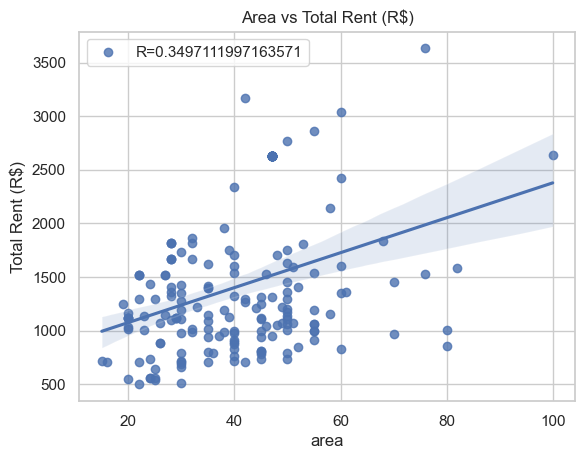

In [32]:
bach6=bachelors['area'].corr(bachelors['total (R$)'])
sns.regplot(data=bachelors,x='area',y='total (R$)',label='R='+str(bach6))
plt.ylabel('Total Rent (R$)')
plt.title('Area vs Total Rent (R$)')
plt.legend()
plt.show()

# Interpretation:
## Here we can see there's a postive correlation between the area and total rent of properties, As the area of property increases the Total rent is also increasing, on this basis bachelors can choose the property accordingly

# Multivariate

In [33]:
bach7=bachelors.groupby('city')[['hoa (R$)','rent amount (R$)','property tax (R$)',
                                                                'fire insurance (R$)']].mean().reset_index()
melted_bach=pd.melt(bach7,id_vars=['city'],var_name='Columns',value_name='Average')
bach7

,city,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,Belo Horizonte,114.161290,1024.903226,33.822581,14.532258
1,Campinas,318.181818,1132.393939,41.575758,15.333333
2,Porto Alegre,242.300000,1240.066667,31.944444,19.000000


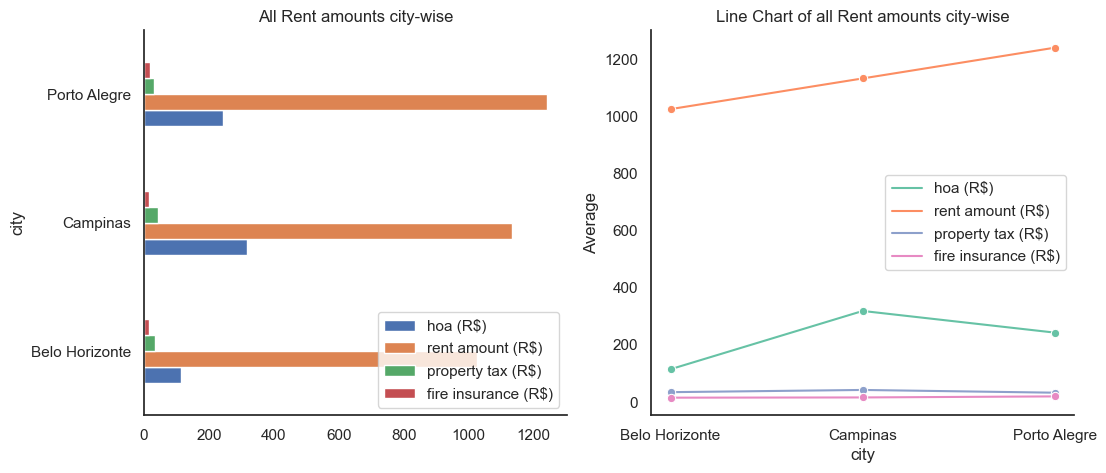

In [34]:
sns.set(style='white')
fig,ax=plt.subplots(1,2,figsize=(12,5))
bach7.plot.barh(x='city',ax=ax[0])
ax[0].set_title('All Rent amounts city-wise')
ax[0].legend(loc='lower right')
sns.lineplot(x='city', y='Average', hue='Columns', data=melted_bach, marker='o',palette='Set2')
ax[1].set_title('Line Chart of all Rent amounts city-wise')
ax[1].legend(loc='center right')
sns.despine()
plt.show()

# Interpretation:
## We can notice from the above charts that the rent amount of Porto Alegre is the highest in the data whereas it is lowest in Belo Horizonte among them, the HOE is also the lowest in the Belo Horizonte.
## Therefore, Belo Horizonte will be the better choice to relocate for bachelors.

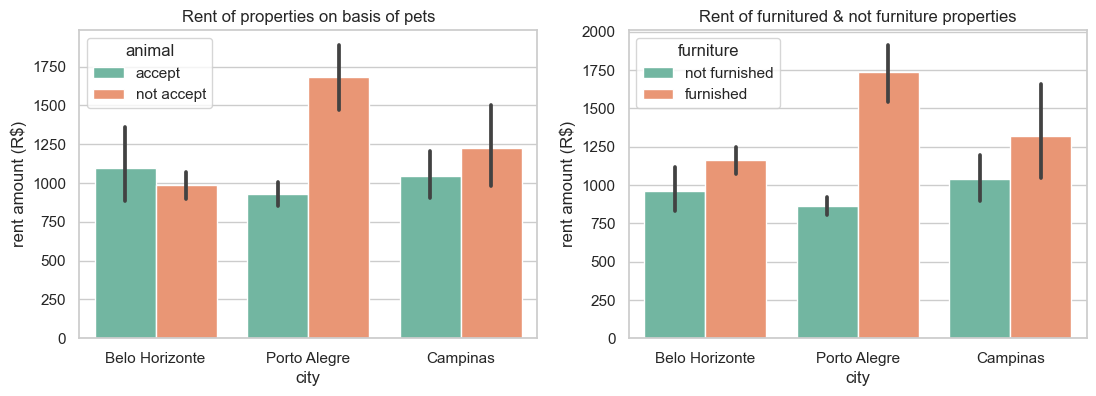

In [35]:
sns.set(style='whitegrid')
fig,ax=plt.subplots(1,2,figsize=(13,4))
ax[0].set_title('Rent of properties on basis of pets')
sns.barplot(x='city',y='rent amount (R$)',hue='animal',data=bachelors,palette='Set2',ax=ax[0])
ax[1].set_title('Rent of furnitured & not furniture properties')
sns.barplot(x='city',y='rent amount (R$)',hue='furniture',data=bachelors,palette='Set2')
plt.show()

# Interpretation:
## in the first chart, we can see the rent amount of properties which doesn't allow animals is the highest in Porto Alegre and it is the lowest in Belo Horizonte city, Therefore Belo Horizonte will be the best city for bachelors to recolate.
## in the second chart, the rent amount of furnished properties are the highest in Porto Alegre and the least in Belo Horizonte

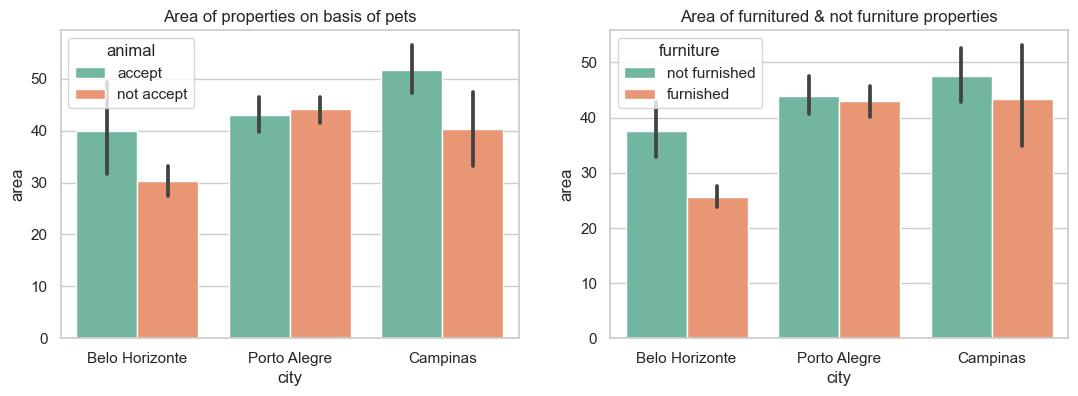

In [36]:
fig,ax=plt.subplots(1,2,figsize=(13,4))
ax[0].set_title('Area of properties on basis of pets')
sns.barplot(x='city',y='area',hue='animal',data=bachelors,palette='Set2',ax=ax[0])
ax[1].set_title('Area of furnitured & not furniture properties')
sns.barplot(x='city',y='area',hue='furniture',data=bachelors,palette='Set2')
plt.show()

# Interpretation:
## in the first chart, we can see the area of properties which doesn't allow animals is the lowest in Belo Horizonte and which is sufficient for the bachelorsthe lowest in Belo Horizonte city, Therefore Belo Horizonte will be the best city for bachelors to recolate.
## in the second chart, the area of furnished properties are almost the same in Porto Alegre and Campinas, and the least is in Belo Horizonte which is already a great choice for bachelors

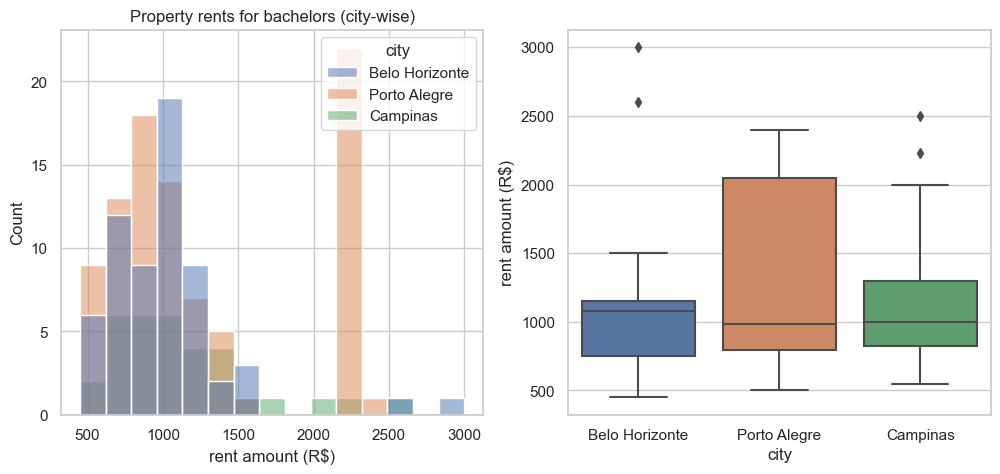

In [37]:
fx,ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=bachelors,hue='city',x='rent amount (R$)',ax=ax[0])
ax[0].set_title('Property rents for bachelors (city-wise)')
sns.boxplot(data=bachelors,y='rent amount (R$)',x='city',ax=ax[1])
plt.show()

# Interpretation:
## Property rent amount frm range 2100-2300 has the maximum properties in Porto Alegre and the most benifical will belo Horizonte from rent amount range 1000-1200 .

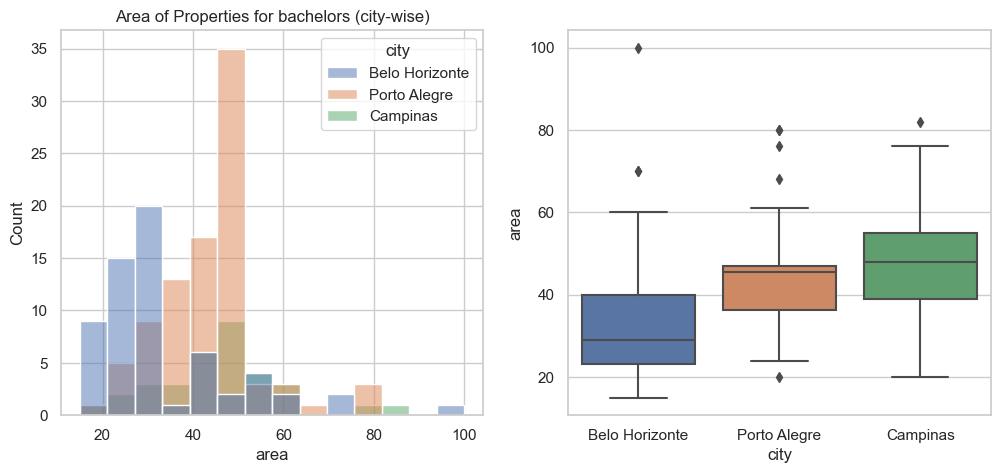

In [38]:
fx,ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=bachelors,hue='city',x='area',ax=ax[0])
ax[0].set_title('Area of Properties for bachelors (city-wise)')
sns.boxplot(data=bachelors,y='area',x='city',ax=ax[1])
plt.show()

# Interpretation:
## properties of area between 45-55 sqr. meter is the most in Porto Alegre city but as we interpreted earlier it'll not much pocket friendly for bachelors that's why they can go with the Belo Horizonte city, which has the second highest number of properties from area of range 25-35.

# For Mid-size Family:

In [39]:
mid_size=df1[(df1.area>=145) & (df1.area<420) & (df1.rooms>1) & (df1.rooms<6) & (df1.bathroom>1) & (df1.bathroom<6) &
           (df1['parking spaces']>1) & (df1['parking spaces']<5) & (df1.floor>1) & (df1.floor<6)].sort_values('total (R$)')
mid_size

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10075,Belo Horizonte,160,3,3,2,2,accept,not furnished,150,1700,0,23,1873
10517,Belo Horizonte,178,3,2,2,2,accept,not furnished,350,1660,154,23,2187
1395,Belo Horizonte,150,3,3,2,4,accept,not furnished,350,1950,0,26,2326
3638,Belo Horizonte,168,4,3,2,2,not accept,not furnished,430,2000,108,27,2565
2802,Belo Horizonte,163,4,3,2,2,accept,not furnished,300,2300,136,31,2767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,Belo Horizonte,300,4,4,4,4,accept,not furnished,2200,10000,1114,134,13450
7579,Belo Horizonte,250,4,3,4,2,accept,not furnished,2745,10000,1228,134,14110
9399,Campinas,231,3,5,4,4,accept,furnished,2200,12000,642,153,15000
1625,Belo Horizonte,260,4,5,4,5,accept,not furnished,2405,15000,153,200,17760


# Univariate

In [40]:
mid_cat_col=mid_size.select_dtypes(np.object)
info_cat(mid_cat_col)

+-----------------------+-----------------+----------------+------------------+
| Categorical Columns   |   Unique Values | Mode           |   Missing values |
|-----------------------+-----------------+----------------+------------------|
| city                  |               3 | Belo Horizonte |                0 |
| animal                |               2 | accept         |                0 |
| furniture             |               2 | not furnished  |                0 |
+-----------------------+-----------------+----------------+------------------+


In [41]:
mid_num_col=mid_size.select_dtypes(np.number)
info_num(mid_num_col)

+---------------------+------------+----------+--------+----------------------+------------------+
| Numerical Columns   |       Mean |   Median |   Mode |   Standard Deviation |   Missing values |
|---------------------+------------+----------+--------+----------------------+------------------|
| area                |  213.669   |      200 |    200 |            55.8758   |                0 |
| rooms               |    3.61654 |        4 |      4 |             0.648095 |                0 |
| bathroom            |    3.28571 |        3 |      3 |             0.981429 |                0 |
| parking spaces      |    2.64662 |        3 |      2 |             0.709198 |                0 |
| floor               |    3.43609 |        3 |      3 |             0.964156 |                0 |
| hoa (R$)            | 1314.05    |     1200 |   1200 |           883.194    |                0 |
| rent amount (R$)    | 4592.02    |     4000 |   3500 |          2549.71     |                0 |
| property

In [42]:
mid1=mid_size.groupby('city').size().reset_index(name='Properties available')
mid1

,city,Properties available
0,Belo Horizonte,89
1,Campinas,12
2,Porto Alegre,32


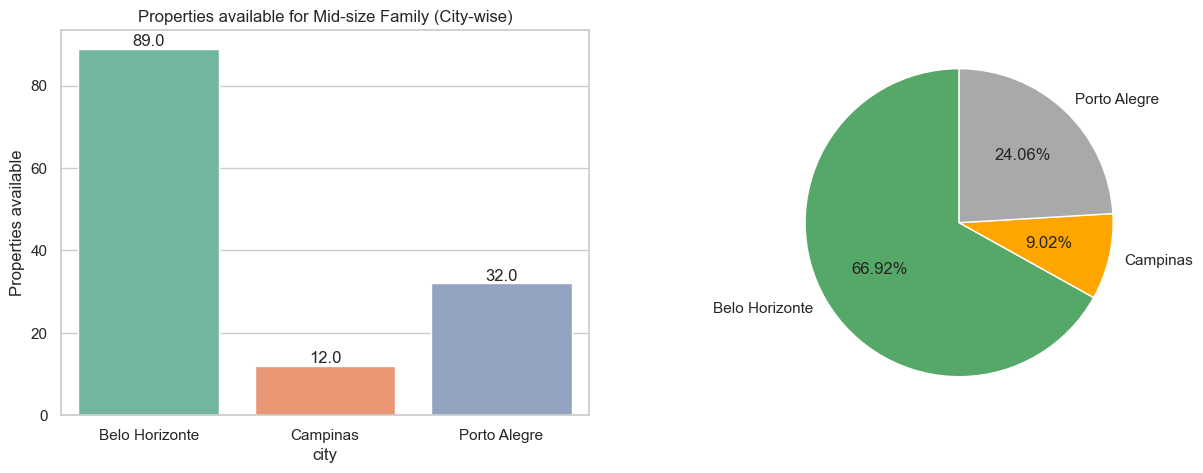

In [43]:
sns.set(style='whitegrid')
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Properties available for Mid-size Family (City-wise)')
ax=sns.barplot(data=mid1,x='city',y='Properties available',ax=ax[0],palette='Set2')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.pie(mid1['Properties available'],labels=mid1['city'],
        autopct='%0.2f%%',startangle=90,colors=['g','orange','darkgrey'])
plt.show()

# Interpretation:
## Here, the number of properties available for Mid-size Family is highest in Belo Horizonte, so there'll be so many options of properties will be available in Belo Horizonte City for Mid-size Family to choose.

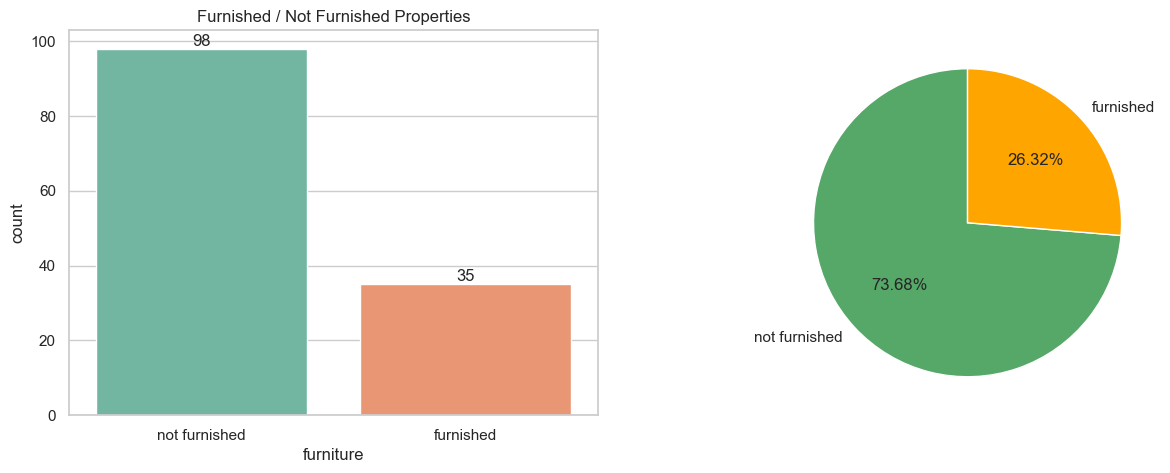

In [44]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Furnished / Not Furnished Properties')
percentage=mid_size['furniture'].value_counts()
label=percentage.keys()
ax=sns.countplot(x=mid_size['furniture'],ax=ax[0],palette='Set2')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.pie(percentage,labels=label,autopct='%0.2f%%',startangle=90,colors=['g','orange'])
plt.show()

# Interpretation:
## The number of furnished properties are just 35 for Mid-size Family while on other hand number of non-furnished properties are about 98, So for those Mid-size Families who're trying to find a furnished house will be a little challenging for them.

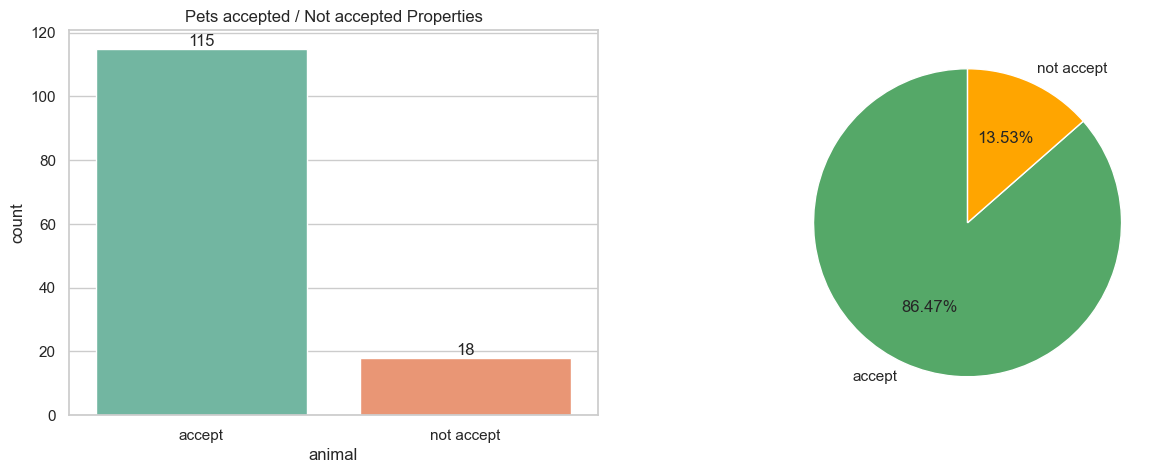

In [45]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Pets accepted / Not accepted Properties')
per=mid_size['animal'].value_counts()
ax=sns.countplot(x=mid_size['animal'],ax=ax[0],palette='Set2')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.pie(per,labels=per.keys(),autopct='%0.2f%%',startangle=90,colors=['g','orange'])
plt.show()

# Interpretation:
## so the number of properties who accept animal is 115 whereas who doesn't is only 18, so, families who are intrested in peting any animal can go to these 115 properties as per their needs.

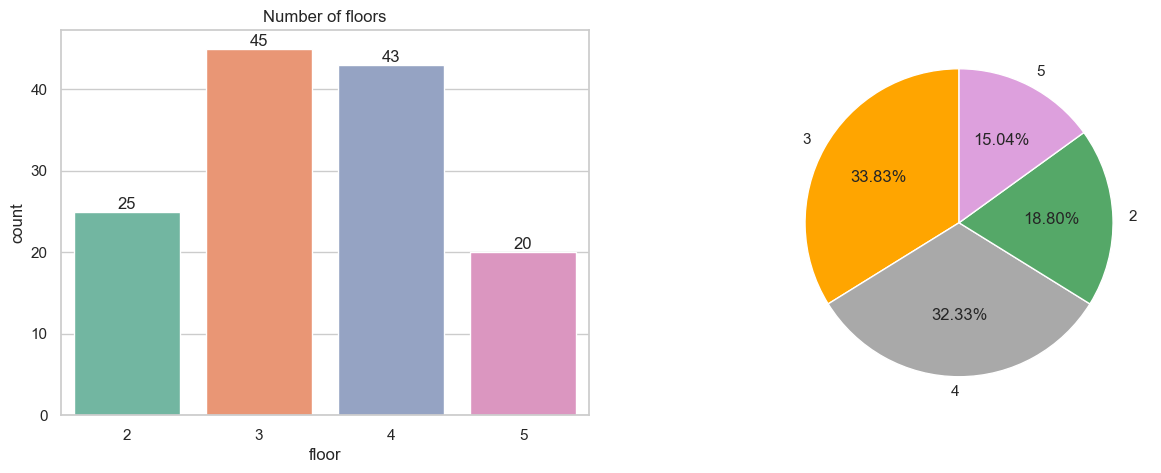

In [46]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Number of floors')
per=mid_size['floor'].value_counts()
ax=sns.countplot(x=mid_size['floor'],ax=ax[0],palette='Set2')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.pie(per,labels=per.keys(),autopct='%0.2f%%',startangle=90,colors=['orange','darkgrey','g','plum'])
plt.show()

# Interpretation:
## so where the number of floors are 3 & 4 are similar (i.e. 45 & 43) aswell as highest in count, so families can get properties easily where floors are 3 & 4, so they can choose accordingly.

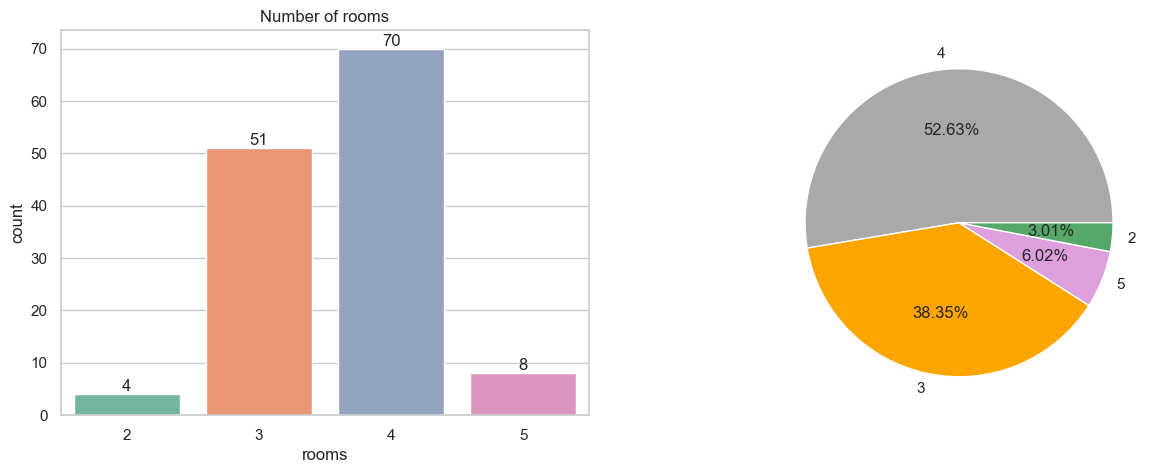

In [47]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Number of rooms')
per=mid_size['rooms'].value_counts()
ax=sns.countplot(x=mid_size['rooms'],ax=ax[0],palette='Set2')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.pie(per,labels=per.keys(),autopct='%0.2f%%',colors=['darkgrey','orange','plum','g'])
plt.show()

# Interpretation:
## here, the properties with 4 rooms are highest in count so it'll be the most preferable category for mid-size family to go with.

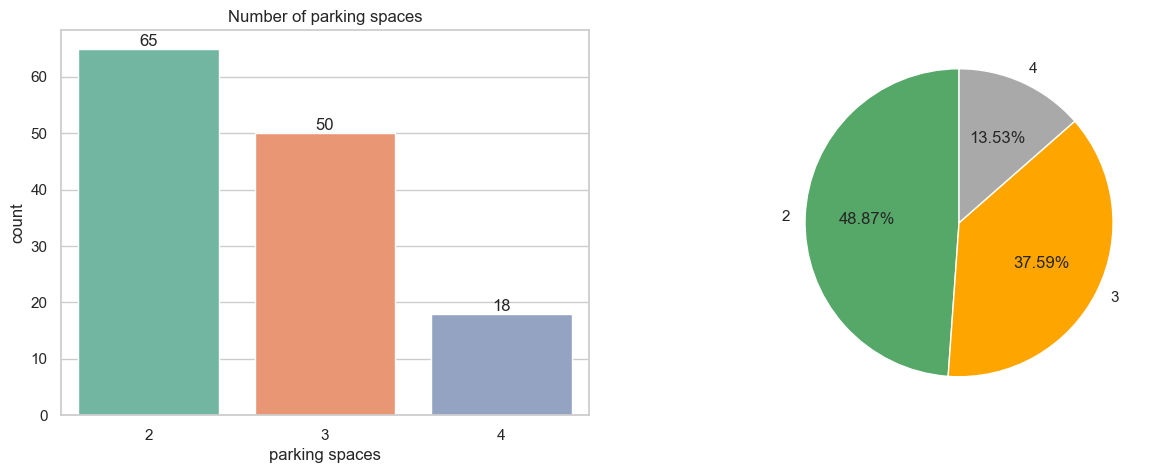

In [48]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Number of parking spaces')
per=mid_size['parking spaces'].value_counts()
ax=sns.countplot(x=mid_size['parking spaces'],ax=ax[0],palette='Set2')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.pie(per,labels=per.keys(),autopct='%0.2f%%',startangle=90,colors=['g','orange','darkgrey'])
plt.show()

# Interpretation:
## mostly the Mid-size Families prefer 2 cars in their family, and here also the count of properties having 2 parking spaces are the highest, so they can choose these properties as it'll be easier to deal with it.

# Bivariant

In [49]:
mid2=mid_size.groupby('city')[['area']].mean().reset_index()
mid2

,city,area
0,Belo Horizonte,206.617978
1,Campinas,230.000000
2,Porto Alegre,227.156250


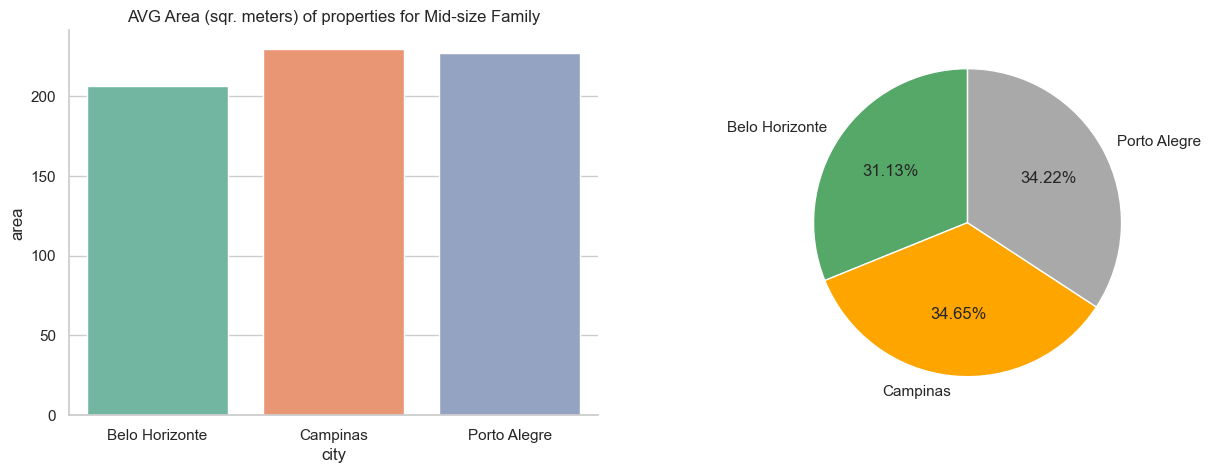

In [50]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('AVG Area (sqr. meters) of properties for Mid-size Family')
sns.barplot(data=mid2,x='city',y='area',ax=ax[0],palette='Set2')
plt.pie(mid2['area'],labels=mid2['city'],autopct='%0.2f%%',startangle=90,colors=['g','orange','darkgrey'])
sns.despine()
plt.show()

# Interpretation:
## average area of properties is the highest in Campinas city and the least in Belo Horizonte, so mostly mid-size family require a middle range of area to livein so they can go with Porto Alegre City.

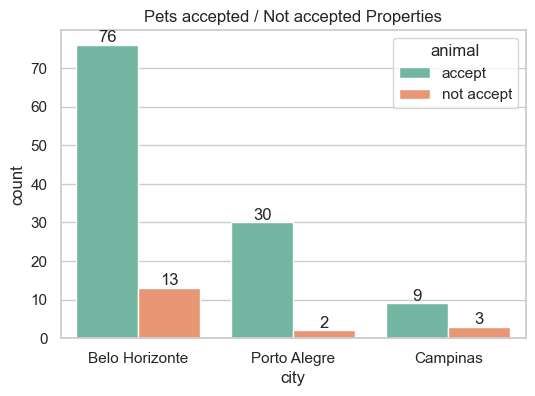

In [51]:
fig,ax=plt.subplots(figsize=(6,4))
sns.countplot(x='city',hue='animal',data=mid_size,palette='Set2')
ax.set_title('Pets accepted / Not accepted Properties')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.show()

# Interpretation:
## So here we can see, The properties available who accepts animal is the highest in Belo Horizonte, so for mid-size family who are intrested in having a pet, it'll be easier to relocate in the Belo Horizonte city.

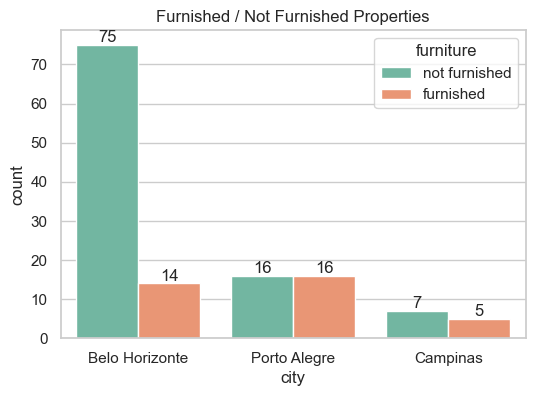

In [52]:
fig,ax=plt.subplots(figsize=(6,4))
sns.countplot(x='city',hue='furniture',data=mid_size,palette='Set2')
ax.set_title('Furnished / Not Furnished Properties')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.show()

# Interpretation:
## Here, number of not furnished properties are most in Belo Horizonte city (i.e. 75) and the furnished properties are in Porto Alegre, so on the basis of furnitures Porto Alegre will be the city to relocate for mid-size family where non-furnished properties are also equal to the number of furnished properties.

In [53]:
mid3=mid_size.groupby('city')[['total (R$)']].mean().reset_index()
mid3

,city,total (R$)
0,Belo Horizonte,5965.157303
1,Campinas,8200.416667
2,Porto Alegre,6612.781250


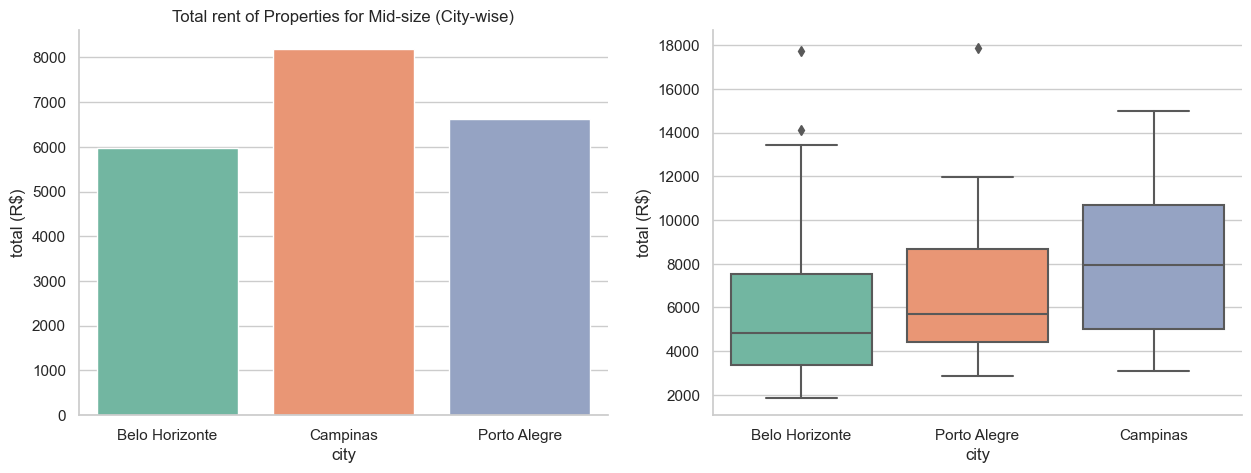

In [54]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Total rent of Properties for Mid-size (City-wise)')
sns.barplot(data=mid3,x='city',y='total (R$)',ax=ax[0],palette='Set2')
sns.boxplot(x='city',y='total (R$)',data=mid_size,palette='Set2')
sns.despine()
plt.show()

# Interpretation:
## The total rent amount of propeties for Mid-size Family is the least in Belo Horizonte city, so they can prefer this city for their recolation because this city will be really cheaper for them according to there needs.

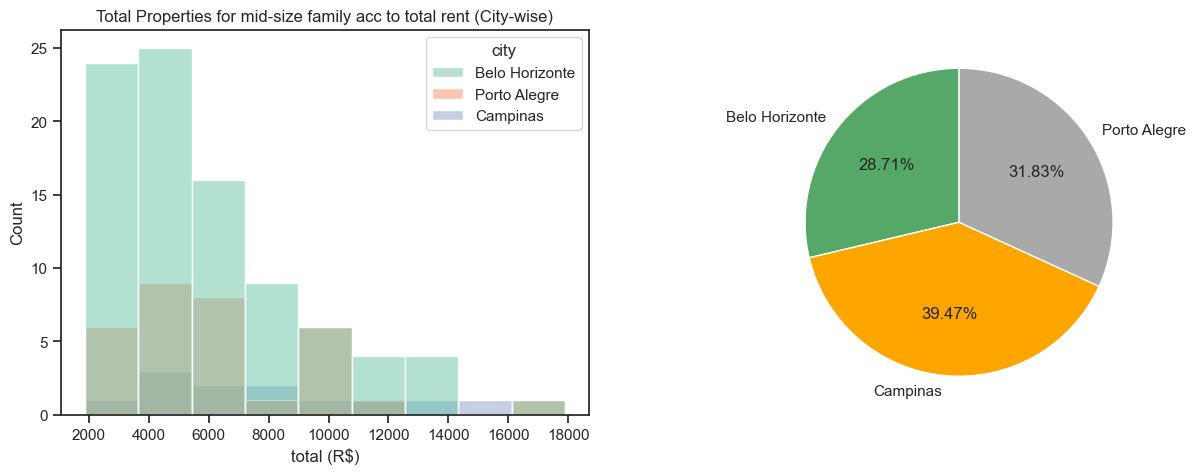

In [55]:
sns.set(style='ticks')
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Total Properties for mid-size family acc to total rent (City-wise)')
sns.histplot(x='total (R$)',hue='city',data=mid_size,ax=ax[0],palette='Set2')
plt.pie(mid3['total (R$)'],labels=mid3['city'],
        autopct='%0.2f%%',startangle=90,colors=['g','orange','darkgrey'])
plt.show()

# Interpretation:
## The number of properties between total rent range of 4000-5000 is the highest for Porto Alegre
## So, for families who're searching for a property with lesser total rent and more number of properties they can go with Porto Alegre City.

In [56]:
mid4=mid_size.groupby('city')['total (R$)'].agg(['mean', 'median', 'std']).reset_index()
mid4

,city,mean,median,std
0,Belo Horizonte,5965.157303,4837.0,3225.763517
1,Campinas,8200.416667,7926.0,3632.916195
2,Porto Alegre,6612.781250,5724.0,3195.991004


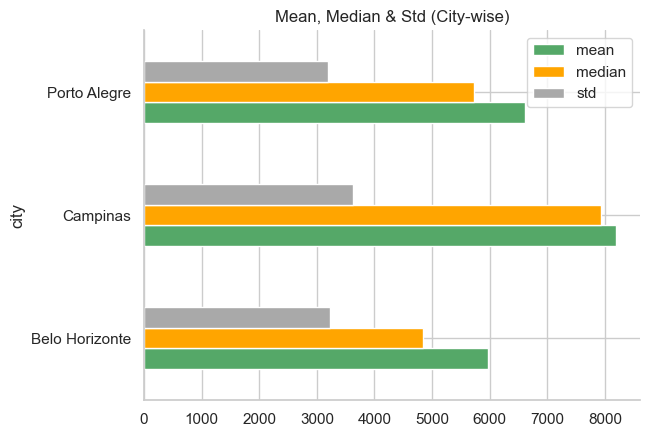

In [57]:
sns.set(style='whitegrid')
mid4.plot.barh(x='city',color=['g','orange','darkgrey'])
plt.title('Mean, Median & Std (City-wise)')
sns.despine()
plt.show()

# Interpretation:
## The mean and median is highest in Campinas city followed by Porto Alegre. So on the basis of total rent a mid-size family can recolate to Belo Horizonte city as the mean value of total rent is the least in this city.

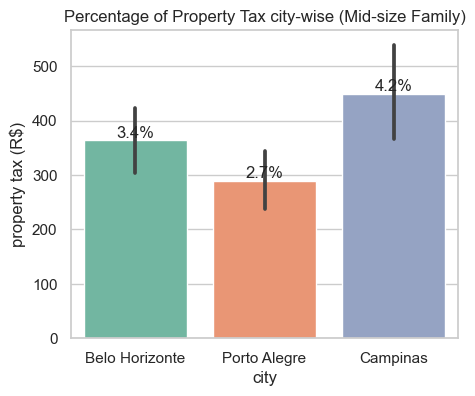

In [58]:
fig,ax=plt.subplots(figsize=(5,4))
ax=sns.barplot(data=mid_size,y='property tax (R$)',x='city',palette='Set2')
plt.title('Percentage of Property Tax city-wise (Mid-size Family)')
for bar in ax.patches:
    percentage=f"{round(bar.get_height() /len(df)*100,2)}%"
    x=bar.get_x()+bar.get_width() /2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va="bottom",ha="center")
plt.show()

# Interpretation:
## The percentage of property tax is the least in Porto Alegre therefore on the basis of property tax Porto Alegre city could be better choice to relocate for a Mid-sized Family

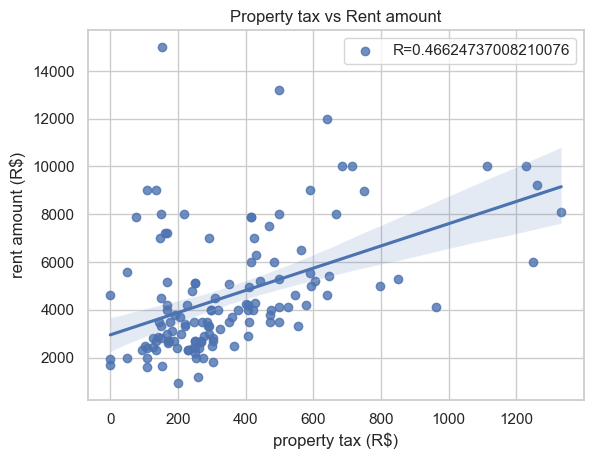

In [59]:
mid5=mid_size['property tax (R$)'].corr(mid_size['rent amount (R$)'])
sns.regplot(data=mid_size,x='property tax (R$)',y='rent amount (R$)',label='R='+str(mid5))
plt.title('Property tax vs Rent amount')
plt.legend(loc='upper right')
plt.show()

# Interpretation:
## Here we can see there's a postive correlation between the rent amount and property tax of properties, As the rent amount increases the property tax is also increasing, on this basis mid-size families can choose the property accordingly.

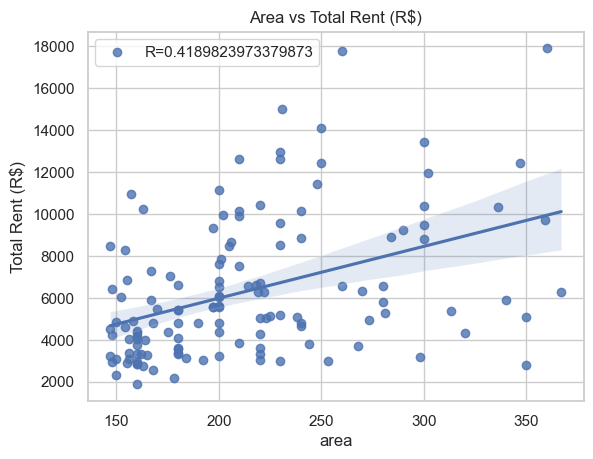

In [60]:
mid6=mid_size['area'].corr(mid_size['total (R$)'])
sns.regplot(data=mid_size,x='area',y='total (R$)',label='R='+str(mid6))
plt.ylabel('Total Rent (R$)')
plt.title('Area vs Total Rent (R$)')
plt.legend()
plt.show()

# Interpretation:
## Here we can see there's a postive correlation between the area and total rent of properties, As the area of property increases the Total rent is also increasing, on this basis they can choose the property accordingly.

# Multivariate

In [61]:
mid7=mid_size.groupby('city')[['hoa (R$)','rent amount (R$)','property tax (R$)',
                                                                'fire insurance (R$)']].mean().reset_index()
melted_mid=pd.melt(mid7,id_vars=['city'],var_name='Columns',value_name='Mean')
mid7

,city,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,Belo Horizonte,1160.966292,4381.258427,363.786517,58.865169
1,Campinas,2045.166667,5633.750000,448.833333,72.000000
2,Porto Alegre,1465.656250,4787.562500,288.812500,70.531250


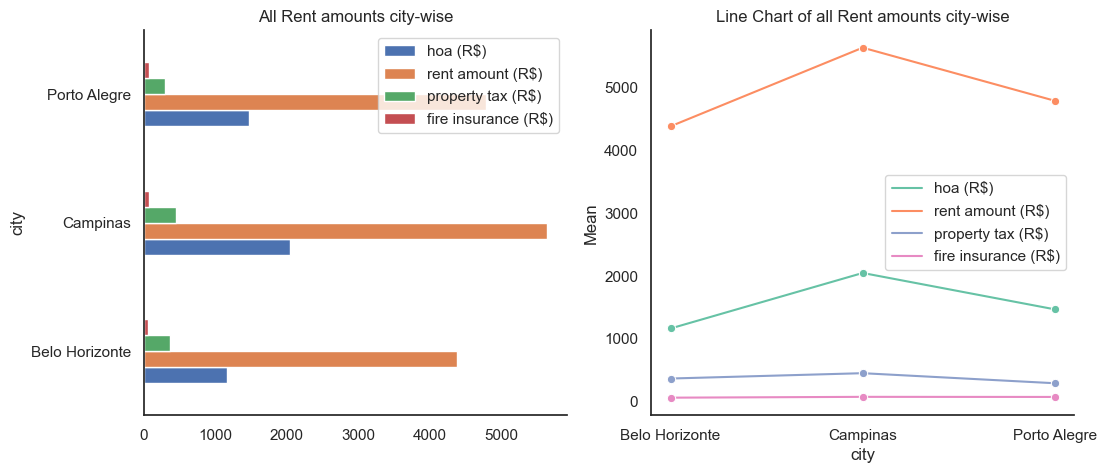

In [62]:
sns.set(style='white')
fig,ax=plt.subplots(1,2,figsize=(12,5))
mid7.plot.barh(x='city',ax=ax[0])
ax[0].set_title('All Rent amounts city-wise')
ax[0].legend(loc='upper right')
sns.lineplot(x='city', y='Mean', hue='Columns', data=melted_mid, marker='o',palette='Set2')
ax[1].set_title('Line Chart of all Rent amounts city-wise')
ax[1].legend(loc='center right')
sns.despine()
plt.show()

# Interpretation:
## We can notice from the above charts that the rent amount of Campinas is the highest in the data whereas it is lowest in Belo Horizonte among them, the HOE is also the lowest in the Belo Horizonte.
## Therefore, Belo Horizonte will be the better choice to relocate on the basis of this chart.

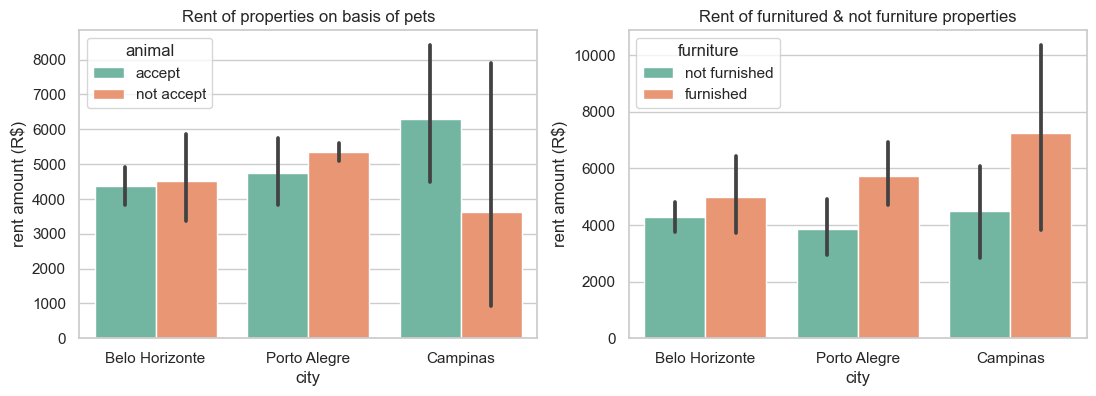

In [63]:
sns.set(style='whitegrid')
fig,ax=plt.subplots(1,2,figsize=(13,4))
ax[0].set_title('Rent of properties on basis of pets')
sns.barplot(x='city',y='rent amount (R$)',hue='animal',data=mid_size,palette='Set2',ax=ax[0])
ax[1].set_title('Rent of furnitured & not furniture properties')
sns.barplot(x='city',y='rent amount (R$)',hue='furniture',data=mid_size,palette='Set2')
plt.show()

# Interpretation:
## in the first chart, we can see the rent amount of properties which accepts animals is the highest in Campinas and it has also the least rent amount who doesn't accepts animals, whereas Porto Alegre city is kind of in between the both cities where rent amount is netural for both the cases, Therefore Porto Alegre will be the best city for Mid-size Family to recolate on the basis of above chart.
## in the second chart, the rent amount of not furnished properties are almost similar in all three cities but the amount for furnished is the lowest in Belo Horizonte so if they're not concerned about the furniture much, they can consider Porto Alegre city for there relocation.

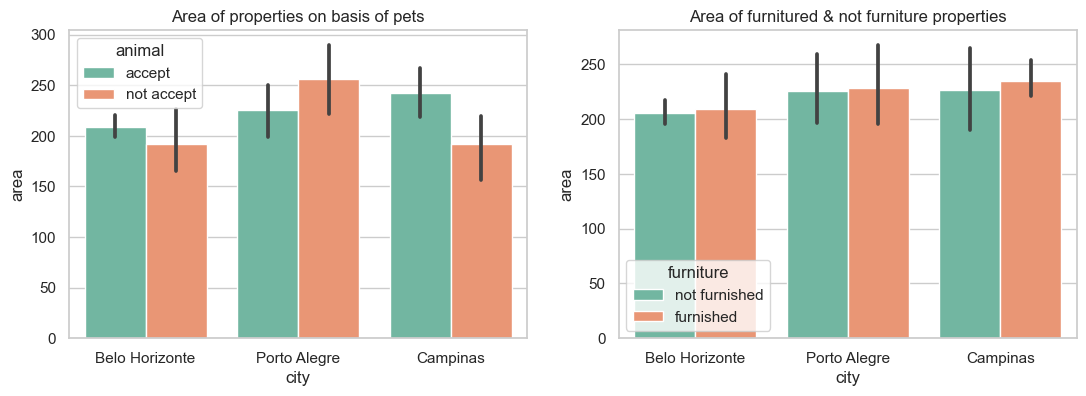

In [64]:
fig,ax=plt.subplots(1,2,figsize=(13,4))
ax[0].set_title('Area of properties on basis of pets')
sns.barplot(x='city',y='area',hue='animal',data=mid_size,palette='Set2',ax=ax[0])
ax[1].set_title('Area of furnitured & not furniture properties')
sns.barplot(x='city',y='area',hue='furniture',data=mid_size,palette='Set2')
plt.show()

# Interpretation:
## in the first chart, we can see the area of properties which doesn't allow animals are similar in Belo Horizonte and Campinas while Porto Alegre has the highest therefore, for families who doesn't prefer having any pet but needs a larger area they can go with the Porto Alegre city.
## in the second chart, the area of furnished and non-furnished properties are almost the same in all the cities.

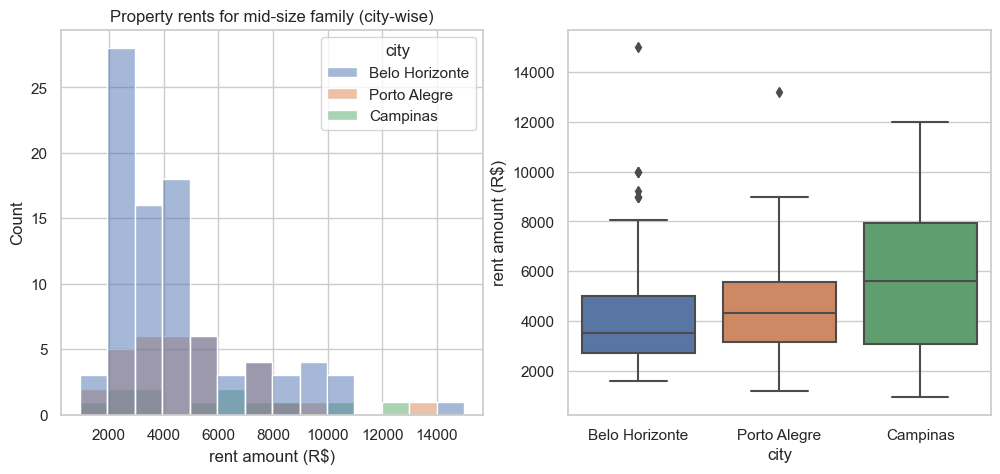

In [65]:
fx,ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=mid_size,hue='city',x='rent amount (R$)',ax=ax[0])
ax[0].set_title('Property rents for mid-size family (city-wise)')
sns.boxplot(data=mid_size,y='rent amount (R$)',x='city',ax=ax[1])
plt.show()

# Interpretation:
## Property rent amount from range 2000-3000 has the maximum properties in Belo Horizonte but we can see there's only one outlier in the Porto Alegre city where rent amount is just slightly higher than Belo Horizonte so they can prefer Porto Alegre as it is not containing much outliers in the rent amount.

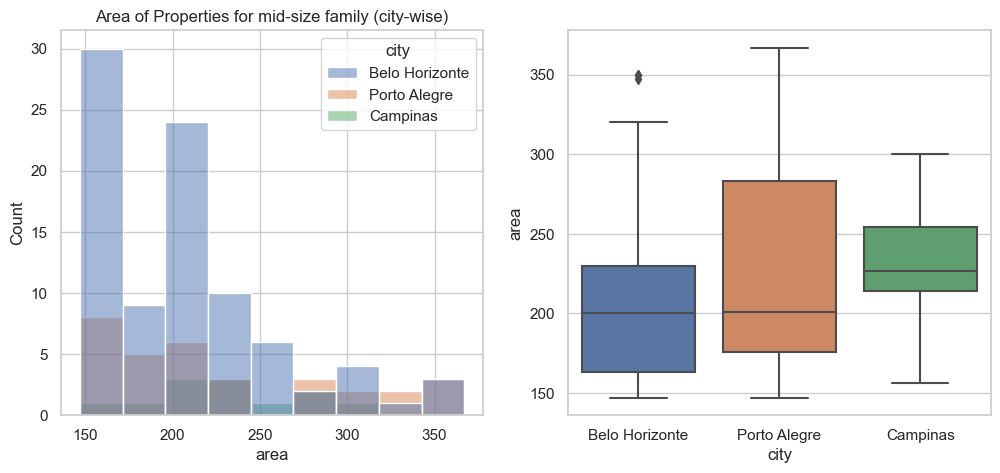

In [66]:
fx,ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=mid_size,hue='city',x='area',ax=ax[0])
ax[0].set_title('Area of Properties for mid-size family (city-wise)')
sns.boxplot(data=mid_size,y='area',x='city',ax=ax[1])
plt.show()

# Interpretation:
## properties of area between 150-175 sqr. meter is the most in Belo Horizonte city but it has also some outliers whereas the Porto Alegre has the highest number of properties with larger area so a mid-size family can relocate to the Porto Alegre city which will be the best choice for them.

# For Large Family

In [67]:
large_size=df1[(df1.area>420) & (df1.rooms>4) & (df1.bathroom>3) & 
               (df1['parking spaces']>3)].sort_values('total (R$)')
large_size

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10392,Porto Alegre,480,5,4,7,0,accept,not furnished,0,3600,38,64,3702
2642,Campinas,450,5,4,8,0,accept,not furnished,0,3460,400,53,3913
10587,Belo Horizonte,500,8,5,8,0,accept,not furnished,0,5000,150,82,5232
546,Belo Horizonte,500,7,4,4,0,accept,not furnished,0,5500,167,91,5758
3647,Belo Horizonte,682,6,7,6,0,accept,not furnished,0,5500,428,91,6019
9320,Belo Horizonte,503,5,5,4,0,accept,not furnished,0,6000,407,99,6506
4040,Belo Horizonte,900,6,6,6,0,accept,not furnished,0,5570,1084,92,6746
6996,Belo Horizonte,640,6,7,5,0,accept,furnished,0,6141,667,101,6909
2423,Belo Horizonte,1020,5,4,6,0,accept,furnished,0,6520,654,107,7281
5028,Porto Alegre,500,5,4,4,4,not accept,not furnished,2000,4000,1250,59,7309


# Univariant

In [68]:
large_cat_col=large_size.select_dtypes(np.object)
info_cat(large_cat_col)

+-----------------------+-----------------+----------------+------------------+
| Categorical Columns   |   Unique Values | Mode           |   Missing values |
|-----------------------+-----------------+----------------+------------------|
| city                  |               3 | Belo Horizonte |                0 |
| animal                |               2 | accept         |                0 |
| furniture             |               2 | not furnished  |                0 |
+-----------------------+-----------------+----------------+------------------+


In [69]:
large_num_col=large_size.select_dtypes(np.number)
info_num(large_num_col)

+---------------------+--------------+----------+--------+----------------------+------------------+
| Numerical Columns   |         Mean |   Median |   Mode |   Standard Deviation |   Missing values |
|---------------------+--------------+----------+--------+----------------------+------------------|
| area                |   637.314    |      616 |    500 |           163.961    |                0 |
| rooms               |     5.56863  |        5 |      5 |             0.964467 |                0 |
| bathroom            |     5.62745  |        6 |      4 |             1.35589  |                0 |
| parking spaces      |     5.84314  |        6 |      4 |             1.64162  |                0 |
| floor               |     0.803922 |        0 |      0 |             3.3765   |                0 |
| hoa (R$)            |   540.412    |        0 |      0 |          1697.59     |                0 |
| rent amount (R$)    |  9315.31     |     8900 |  15000 |          3535.96     |          

In [70]:
large1=large_size.groupby('city').size().reset_index(name='Properties available')
large1

,city,Properties available
0,Belo Horizonte,35
1,Campinas,9
2,Porto Alegre,7


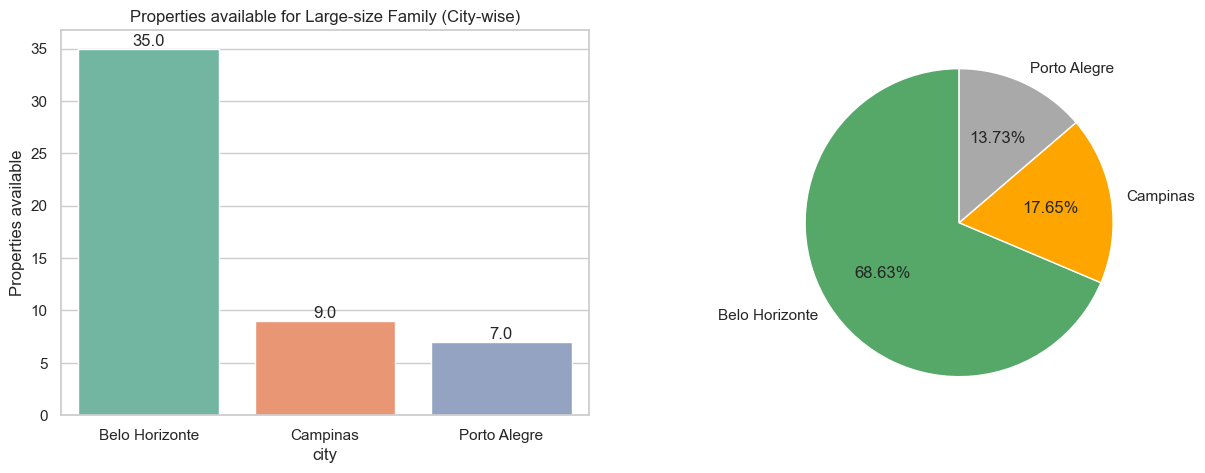

In [71]:
sns.set(style='whitegrid')
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Properties available for Large-size Family (City-wise)')
ax=sns.barplot(data=large1,x='city',y='Properties available',ax=ax[0],palette='Set2')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.pie(large1['Properties available'],labels=large1['city'],
        autopct='%0.2f%%',startangle=90,colors=['g','orange','darkgrey'])
plt.show()

# Interpretation:
## Here, the number of properties available for Large Family is highest in Belo Horizonte, so there'll be so many options of properties will be available in Belo Horizonte City for Large Family to choose.

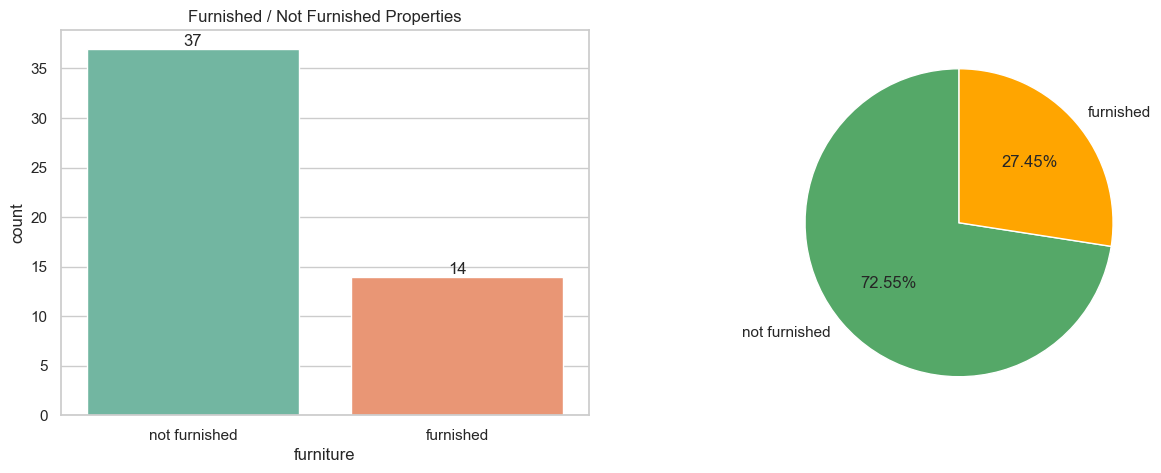

In [72]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Furnished / Not Furnished Properties')
percentage=large_size['furniture'].value_counts()
label=percentage.keys()
ax=sns.countplot(x=large_size['furniture'],ax=ax[0],palette='Set2')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.pie(percentage,labels=label,autopct='%0.2f%%',startangle=90,colors=['g','orange'])
plt.show()

# Interpretation:
## The number of furnished properties are just 14 for Large Family while on other side number of non-furnished properties are about 37, So for those Large Families who're trying to find a furnished house will be a little challenging for them.

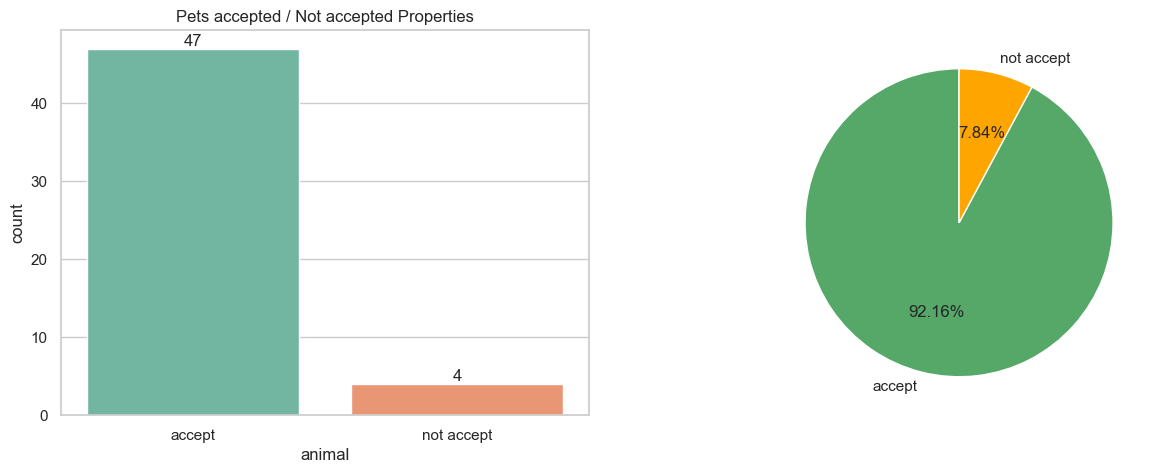

In [73]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Pets accepted / Not accepted Properties')
per=large_size['animal'].value_counts()

ax=sns.countplot(x=large_size['animal'],ax=ax[0],palette='Set2')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.pie(per,labels=per.keys(),autopct='%0.2f%%',startangle=90,colors=['g','orange'])
plt.show()

# Interpretation:
## so the number of properties who accept animal is 47 whereas who doesn't is only 4, so, families who are intrested in having any pet can go to these 47 properties as per their needs.

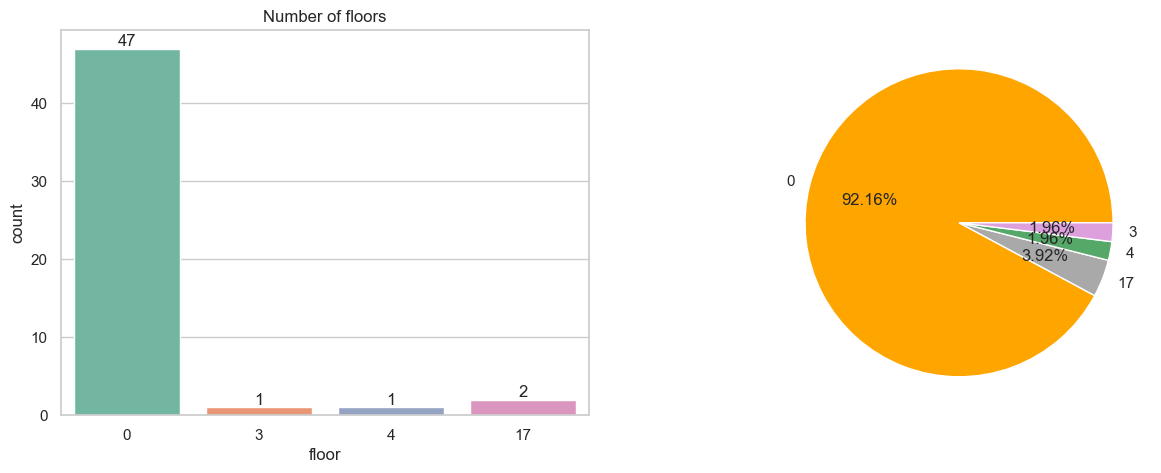

In [74]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Number of floors')
per=large_size['floor'].value_counts()
ax=sns.countplot(x=large_size['floor'],ax=ax[0],palette='Set2')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.pie(per,labels=per.keys(),autopct='%0.2f%%',colors=['orange','darkgrey','g','plum'])
plt.show()

# Interpretation:
## so where the number of floors are 3, 4 and 17 are almost similar (i.e. 2,1 and 1) and mostly Large Families doesn't prefer many floors and choose a large area in a single floor therefore they can go with the 0 floor's properties as they're also high in count.

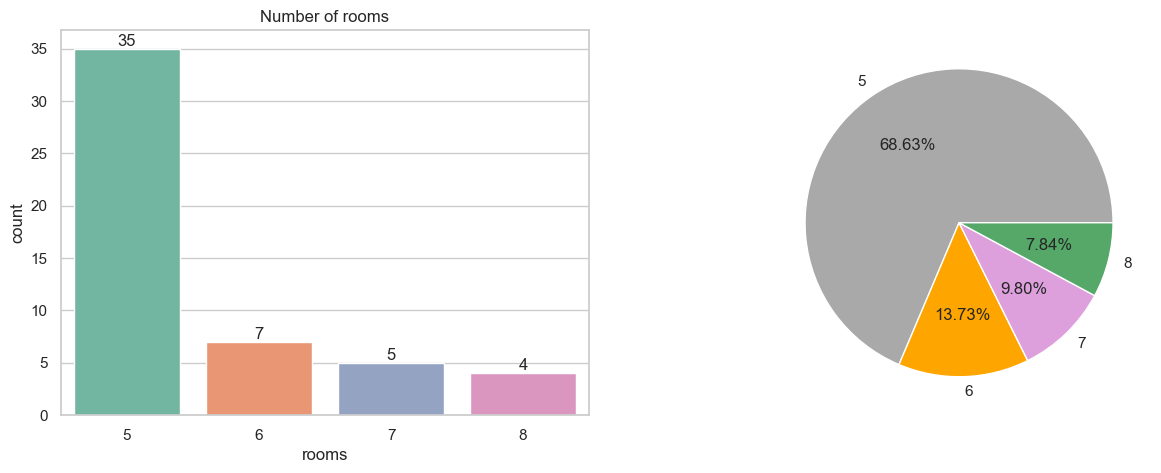

In [75]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Number of rooms')
per=large_size['rooms'].value_counts()
ax=sns.countplot(x=large_size['rooms'],ax=ax[0],palette='Set2')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.pie(per,labels=per.keys(),autopct='%0.2f%%',colors=['darkgrey','orange','plum','g'])
plt.show()

# Interpretation:
## here, the properties with 5 rooms are highest in count so it'll be easier job to find a property with 5 rooms instead of 6,7 or 8 rooms.

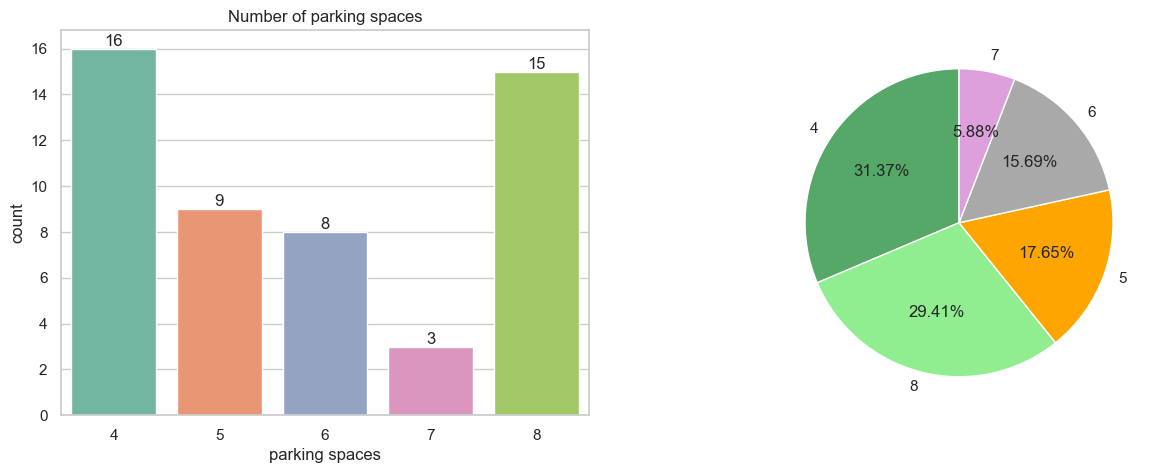

In [76]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Number of parking spaces')
per=large_size['parking spaces'].value_counts()
ax=sns.countplot(x=large_size['parking spaces'],ax=ax[0],palette='Set2')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.pie(per,labels=per.keys(),autopct='%0.2f%%',startangle=90,colors=['g','lightgreen','orange','darkgrey','plum'])
plt.show()

# Interpretation:
## mostly the Large Families prefers the maximum numberof parking spaces as possible and here also the count of properties having 8 parking spaces are the more htan enough, so they can go with this choice as this'll be easier find a property with 8 parking spaces.

# Bivariant

In [77]:
large2=large_size.groupby('city')[['area']].mean().reset_index()
large2

,city,area
0,Belo Horizonte,658.428571
1,Campinas,633.222222
2,Porto Alegre,537.000000


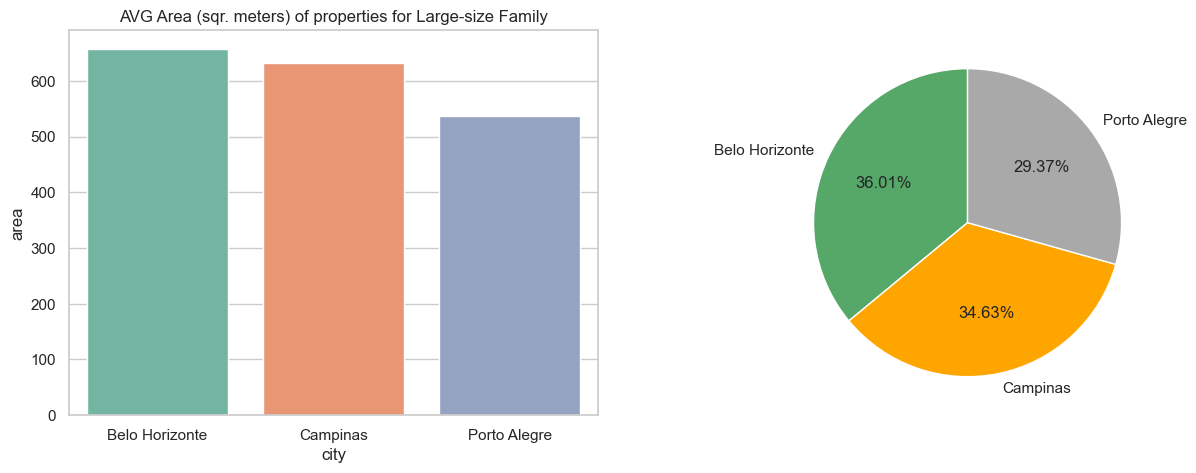

In [78]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('AVG Area (sqr. meters) of properties for Large-size Family')
sns.barplot(data=large2,x='city',y='area',ax=ax[0],palette='Set2')
plt.pie(large2['area'],labels=large2['city'],autopct='%0.2f%%',startangle=90,colors=['g','orange','darkgrey'])
plt.show()

# Interpretation:
## average area of properties is the highest in Belo Horizonte and the least in Porto Alegre, so mostly Large family require the largest area possible to livein so they can go with Belo Horizonte City.


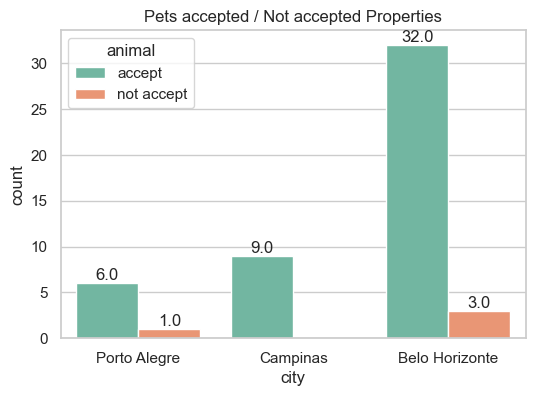

In [79]:
fig,ax=plt.subplots(figsize=(6,4))
sns.countplot(x='city',hue='animal',data=large_size,palette='Set2')
ax.set_title('Pets accepted / Not accepted Properties')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.show()

# Interpretation:
## So here we can see, The properties available who accepts animal is the highest in Belo Horizonte, so for a Large family who are intrested in having a pet, it'll be easier to relocate in the Belo Horizonte city.

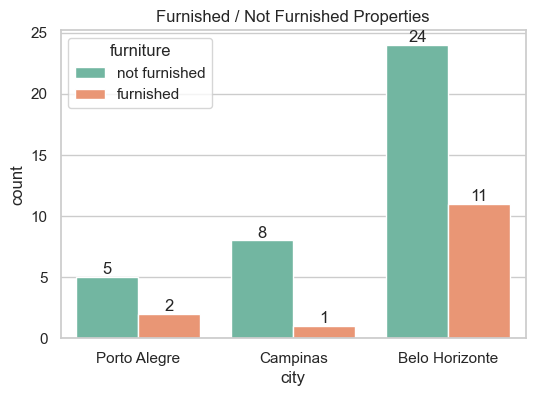

In [80]:
fig,ax=plt.subplots(figsize=(6,4))
sns.countplot(x='city',hue='furniture',data=large_size,palette='Set2')
ax.set_title('Furnished / Not Furnished Properties')
for bar in ax.patches:
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(str(y),(x,y),va="bottom",ha="center")
plt.show()

# Interpretation:
## Here, number of not furnished properties as well as furnished properties are most in Belo Horizonte city, so on the basis of furnitures Belo Horizonte will be the city to relocate for Large family.

In [81]:
large3=large_size.groupby('city')[['total (R$)']].mean().reset_index()
large3

,city,total (R$)
0,Belo Horizonte,11254.628571
1,Campinas,10395.222222
2,Porto Alegre,9284.285714


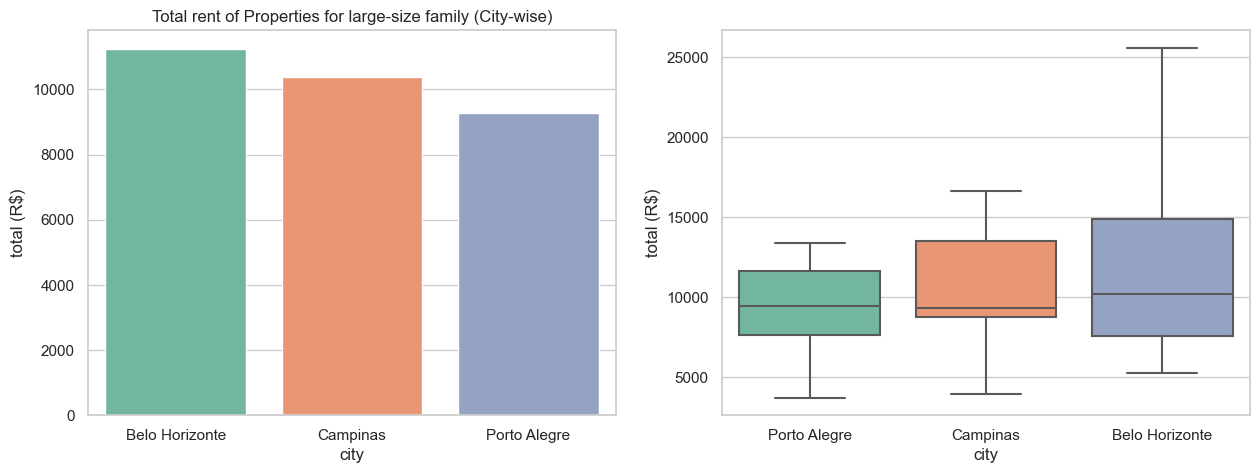

In [82]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Total rent of Properties for large-size family (City-wise)')
sns.barplot(data=large3,x='city',y='total (R$)',ax=ax[0],palette='Set2')
sns.boxplot(x='city',y='total (R$)',data=large_size,palette='Set2')
plt.show()

# Interpretation:
## The total rent amount of propeties for Large Family is the least in Porto Alegre city, but as we interpreted earlier the area is the largest in Campinas city which total rent is just slightly higher than of Porto Alegre, so Large Families should go with the Campinas city as they were getting larger area but almost similar total rent there.

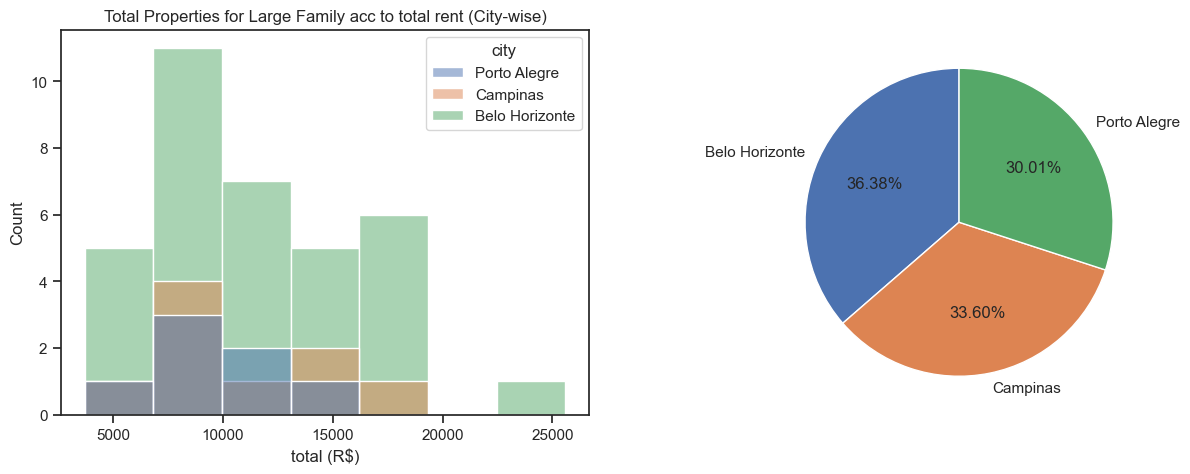

In [83]:
sns.set(style='ticks')
fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('Total Properties for Large Family acc to total rent (City-wise)')
sns.histplot(x='total (R$)',hue='city',data=large_size,ax=ax[0])
plt.pie(large3['total (R$)'],labels=large3['city'],
        autopct='%0.2f%%',startangle=90)
plt.show()

# Interpretation:
## The number of properties between total rent range of 6500-10000 is the highest for Belo Horizonte and second one is Campinas, so as we discussed Campinas is having larger area among them with similar total rent
## So, Large families who're searching for a property with lesser total rent and more number of properties they can go with Campinas City.

In [84]:
large4=large_size.groupby('city')['total (R$)'].agg(['mean', 'median', 'std']).reset_index()
large4

,city,mean,median,std
0,Belo Horizonte,11254.628571,10170.0,4488.916606
1,Campinas,10395.222222,9292.0,3950.544576
2,Porto Alegre,9284.285714,9410.0,3296.038972


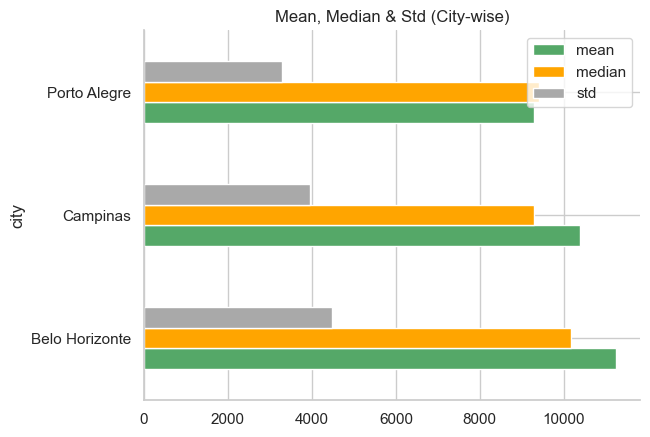

In [85]:
sns.set(style='whitegrid')
large4.plot.barh(x='city',color=['g','orange','darkgrey'])
plt.title('Mean, Median & Std (City-wise)')
sns.despine()
plt.show()

# Interpretation:
## Mean & Median of totel rent is the highest for Belo Horizonte, whereas the median is lowest in Campinas city. So on the basis of total rent, a Large family can recolate to Campinas city as the properties in Campinas will meet all the requirements of Large families.

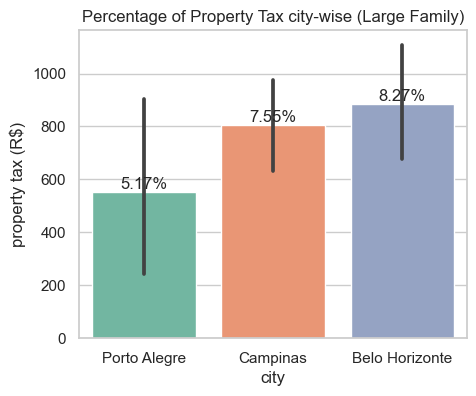

In [86]:
fig,ax=plt.subplots(figsize=(5,4))
ax=sns.barplot(data=large_size,y='property tax (R$)',x='city',palette='Set2')
plt.title('Percentage of Property Tax city-wise (Large Family)')
for bar in ax.patches:
    percentage=f"{round(bar.get_height() /len(df)*100,2)}%"
    x=bar.get_x()+bar.get_width() /2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),va="bottom",ha="center")
plt.show()

# Interpretation:
## The percentage of property tax is the least in Porto Alegre therefore on the basis of property tax Porto Alegre city could be better choice but having a lower property tax mean the facilities will be less according to the needs of a Large family, so as we interpreted earlier Campinas city will be best to relocate for a Large Family as they have a neutral property tax among all of them.

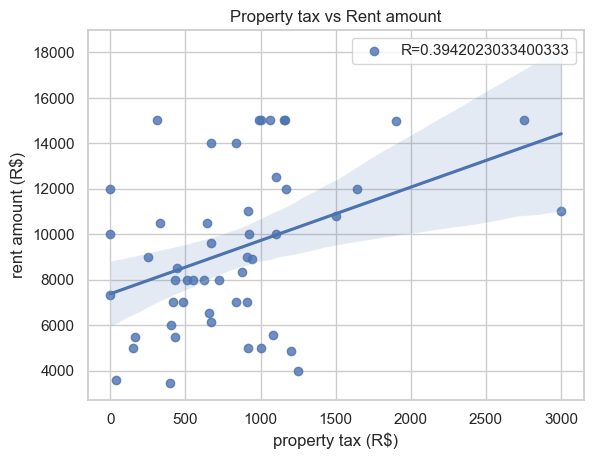

In [87]:
large5=large_size['property tax (R$)'].corr(large_size['rent amount (R$)'])
sns.regplot(data=large_size,x='property tax (R$)',y='rent amount (R$)',label='R='+str(large5))
plt.title('Property tax vs Rent amount')
plt.legend(loc='upper right')
plt.show()

# Interpretation:
## Here we can see there's a postive correlation between the rent amount and property tax of properties, As the rent amount increases the property tax is also increasing, on this basis Large families can choose the property accordingly.

# Multivariate

In [88]:
large7=large_size.groupby('city')[['hoa (R$)','rent amount (R$)','property tax (R$)',
                                                                'fire insurance (R$)']].mean().reset_index()
melted_large=pd.melt(large7,id_vars=['city'],var_name='Columns',value_name='Mean')
large7

,city,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,Belo Horizonte,230.857143,9976.028571,884.628571,162.657143
1,Campinas,1942.333333,7535.555556,806.777778,110.000000
2,Porto Alegre,285.714286,8300.000000,553.285714,146.142857


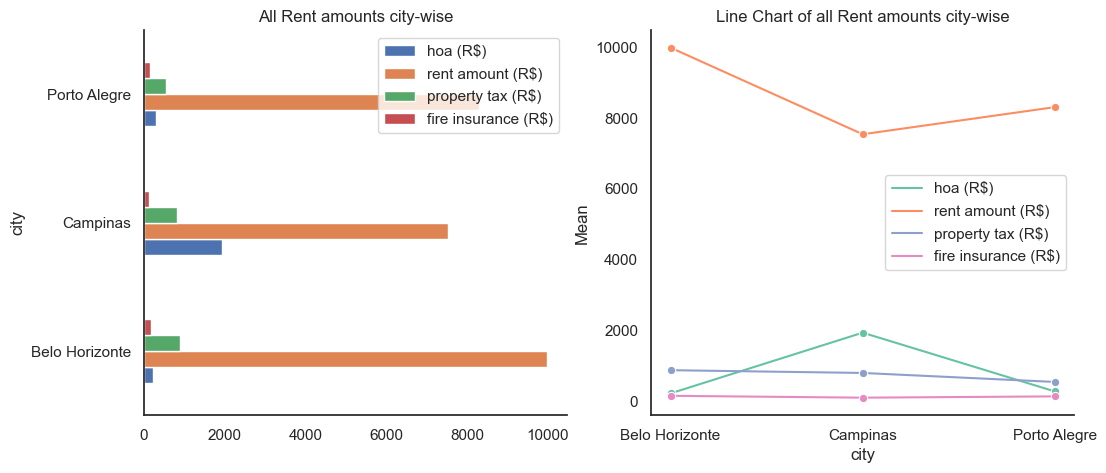

In [89]:
sns.set(style='white')
fig,ax=plt.subplots(1,2,figsize=(12,5))
large7.plot.barh(x='city',ax=ax[0])
ax[0].set_title('All Rent amounts city-wise')
ax[0].legend(loc='upper right')
sns.lineplot(x='city', y='Mean', hue='Columns', data=melted_large, marker='o',palette='Set2')
ax[1].set_title('Line Chart of all Rent amounts city-wise')
ax[1].legend(loc='center right')
sns.despine()
plt.show()

# Interpretation:
## We can notice from the above charts that the rent amount of Campinas is the lowest in the data whereas it is highest in Belo Horizonte among them, the HOE is also the highest in the Campinas.
## Therefore, Campinas will be the better choice to relocate for a Large Family on the basis of this chart.

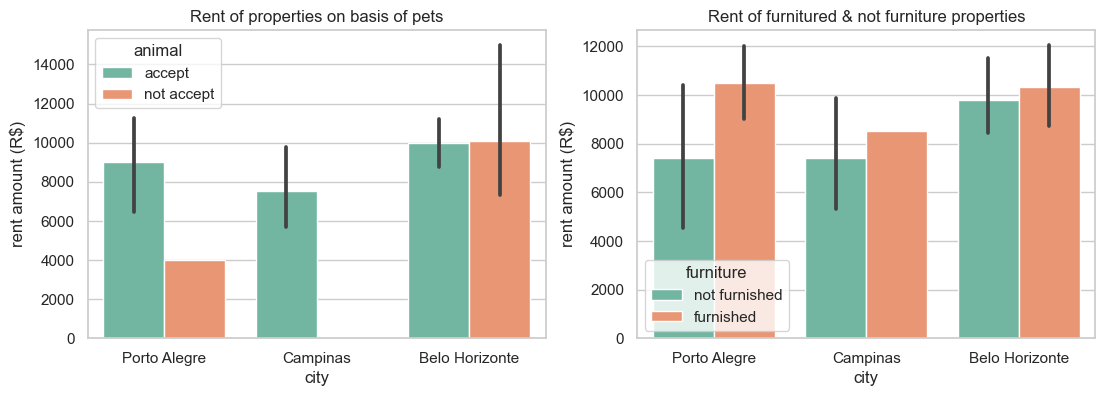

In [90]:
sns.set(style='whitegrid')
fig,ax=plt.subplots(1,2,figsize=(13,4))
ax[0].set_title('Rent of properties on basis of pets')
sns.barplot(x='city',y='rent amount (R$)',hue='animal',data=large_size,palette='Set2',ax=ax[0])
ax[1].set_title('Rent of furnitured & not furniture properties')
sns.barplot(x='city',y='rent amount (R$)',hue='furniture',data=large_size,palette='Set2')
plt.show()

# Interpretation:
## in the first chart, we can see the rent amount of properties which accepts animals is the highest in Belo Horizonte and lowest in Campinas and it doesn't have any properties that doesn't allow animal and as we discussed having pet in a Large family is must nowadays because of safety purposes aswell so Campinas city will be best to relocate for Large family.
## in the second chart, the rent amount of furnished properties is highest in Porto Alegre  and the rent amount for furnished is the lowest also in Campinas so they can consider Campinas city for there relocation because it has the lowest rent of furnished property.

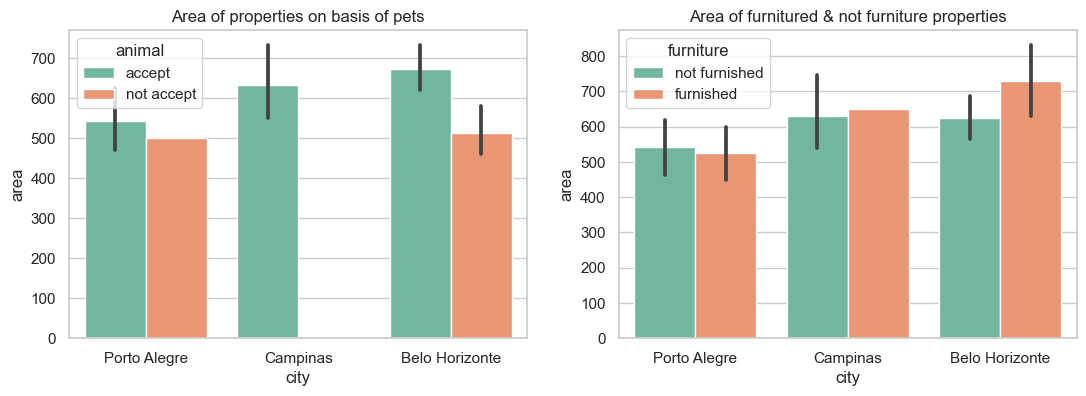

In [91]:
fig,ax=plt.subplots(1,2,figsize=(13,4))
ax[0].set_title('Area of properties on basis of pets')
sns.barplot(x='city',y='area',hue='animal',data=large_size,palette='Set2',ax=ax[0])
ax[1].set_title('Area of furnitured & not furniture properties')
sns.barplot(x='city',y='area',hue='furniture',data=large_size,palette='Set2')
plt.show()

# Interpretation:
## we can see the area of properties which doesn't allow animals are zero in count in Campinas and as we discussed pets are must in Large families therefore they can go with the Campinas city.

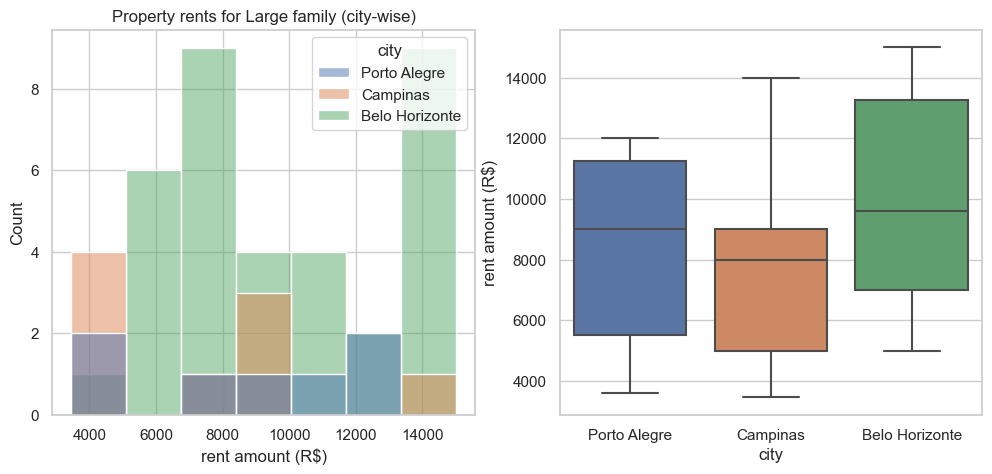

In [92]:
fx,ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=large_size,hue='city',x='rent amount (R$)',ax=ax[0])
ax[0].set_title('Property rents for Large family (city-wise)')
sns.boxplot(data=large_size,y='rent amount (R$)',x='city',ax=ax[1])
plt.show()

# Interpretation:
## Property rent amount from range 7000-8000 has the maximum properties in Belo Horizonte but the rent amount we can see there's for Campinas city is less so they can choose the Campinas city for there relocation.

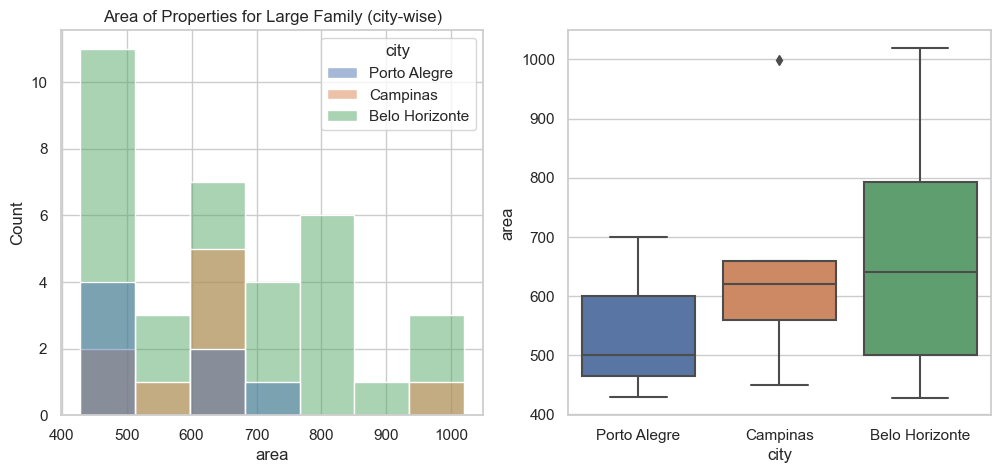

In [93]:
fx,ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=large_size,hue='city',x='area',ax=ax[0])
ax[0].set_title('Area of Properties for Large Family (city-wise)')
sns.boxplot(data=large_size,y='area',x='city',ax=ax[1])
plt.show()

# Interpretation:
## properties of area between 600-700 sqr. meter is the most in Campinas city and as we discussed earlier it is also the most preffered city to relocate for Large Family so they can easily go with this choice as the facilities will meet all the requirements they have.